# Исследование игровой индустрии домашних игровых систем

Исследуем интернет-магазин "Стримчик", который продаёт компьютерные игры по всему миру. Из открытых источников имеем данные о продажах консольных игр, оценки пользователей и экспертов, жанры и платформы (Xbox, PlayStation).

<b>Цель исследования:</b>

Выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>

<b>Ход исследования:</b>

Получим данные, предобработаем их, опишем и визуализируем общую информацию об играх, проведем исследовательский анализ и проверку гипотез:

1. Обзор данных
2. Предобработка данных
3. Проведение исследовательского анализа предоставленных данных
4. Составление среднепользовательского портрета для основных регионов (NA, EU, JP)
5. Проверка гипотез<br>
&nbsp; - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<br>
&nbsp; - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные<br>
6. Сделаем выводы и дадим рекомендации, которые могут помочь бизнесу.

## 1️⃣ Загрузка данных

### Импортирование стандартных библиотек python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom

### Импортирование данных

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

### Дубликаты

In [3]:
df.duplicated().sum() # проверка на наличие дубликатов

0

### Общая информация о полученных данных

In [4]:
df.info() # общая информация таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Переименование названий столбцов

In [5]:
df.rename(
    columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year', 'Genre':'genre', 'NA_sales':'na',
             'EU_sales':'eu', 'JP_sales':'jp', 'Other_sales':'other','Critic_Score':'critic_score',
             'User_Score':'user_score', 'Rating':'rating'}, inplace=True
)

#### Просмотр данных

In [6]:
df.head(10) # отобразим первые 10 строчек таблицы

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Описание колонок
- `name` - название игры
- `platform` - платформа
- `year` - год выпуска
- `genre` - жанр игры
- `na` - продажи в Северной Америке (миллионы проданных копий)
- `eu` - продажи в Европе (миллионы проданных копий)
- `jp` -  продажи в Японии (миллионы проданных копий)
- `other` - продажи в других странах (миллионы проданных копий)
- `critic_score` - оценка критиков (максимум 100)
- `user_score` - оценка пользователей (максимум 10)
- `rating` - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Пропуски данных

In [7]:
df.isna().agg({sum}) # проверим на наличие пропусков данных

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
sum,2,0,269,2,0,0,0,0,8578,6701,6766


In [8]:
pd.DataFrame(df.isna().mean().mul(100).round(2).astype(str) + '%') # пропуски данных в долях

,0
name,0.01%
platform,0.0%
year,1.61%
genre,0.01%
na,0.0%
eu,0.0%
jp,0.0%
other,0.0%
critic_score,51.32%
user_score,40.09%


### <b>Вывод</b> 🔉<br>

<div style="border:solid SteelBlue 3px; padding: 20px; border-radius: 10px">

* В предоставленной таблице 16715 строк, 11 колонок<br>
* 2 типа данных `object`,`float64`<br>
* Имеются пропуски. Минимум: `name`, `year`, `genre`. Самые большие значения пропусков `critic_score`, `user_score` и `rating`
</div>

## 2️⃣ Предобработка данных

### `name` - название игры

In [9]:
df['name'].count # общая информация

<bound method Series.count of 0                           Wii Sports
1                    Super Mario Bros.
2                       Mario Kart Wii
3                    Wii Sports Resort
4             Pokemon Red/Pokemon Blue
                     ...              
16710    Samurai Warriors: Sanada Maru
16711                 LMA Manager 2007
16712          Haitaka no Psychedelica
16713                 Spirits & Spells
16714              Winning Post 8 2016
Name: name, Length: 16715, dtype: object>

In [10]:
set(df['name'].unique()) # просмотр уникальных значений

{'Army Men: Soldiers of Misfortune',
 "Total Overdose: A Gunslinger's Tale in Mexico",
 'Batman: Arkham Knight',
 'UFC: Sudden Impact',
 'Singularity',
 'One Piece: Romance Dawn - Bouken no Yoake',
 'EverQuest Online Adventures',
 'Winning Post 7 Maximum 2008',
 'uDraw Studio',
 'God of War',
 'Caesars Palace Advance: Millennium Gold Edition',
 'Demon Driver: Time to Burn Rubber!',
 'Star Wars Episode I: The Phantom Menace',
 'Scene It? Box Office Smash',
 'Haneru no Tobira DS: Tanshuku Tetsudou no Yoru',
 '2 Games in 1: Sonic Advance & ChuChu Rocket!',
 'Yuu Yuu Hakusho: Makyo Toitsusen',
 'TimeSplitters',
 'Momotarou Dentetsu V',
 'Country Dance',
 'Ochaken no Heya DS 2',
 'The Wonderful 101',
 'Ratchet & Clank: Up Your Arsenal (Weekly american sales)',
 'Remington Super Slam Hunting: Africa',
 'Drill Dozer',
 'PoPoLoCrois Monogatari',
 'Robin Hood: Defender of the Crown',
 "Rubik's World",
 'Jewel Link Chronicles: Mountains of Madness',
 'The Legend of Heroes III: Song of the Ocean'

In [11]:
df['name'].value_counts() # просмотр уникальных значений и их количества

name
Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: count, Length: 11559, dtype: int64

Имеются повторяющиеся названия игр, но они для разных платформ и разных версий выпуска:

In [12]:
df.query('name == "Need for Speed: Most Wanted"')

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Поищем неочевидные дубликаты по колонкам: `name`, `platform` и `year`

In [13]:
df[df.duplicated(subset=['name', 'platform'], keep=False)].sort_values('name')

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<b>4 пары игр и 2 пустых значения</b><br>
1. Madden NFL 13 - объединим. Продажи по eu добавим в первый вариант. Второй вариант удалим<br>
2. Need for Speed: Most Wanted (X360) - разные года у игр. Разные версии игры. Ничего менять не будем<br>
3. Need for Speed: Most Wanted (PC) - разные года у игр. Разные версии игры. Ничего менять не будем<br>
4. Sonic the Hedgehog - объединим. Продажи по eu добавим в первый вариант. Второй вариант удалим<br>
5. NaN - пустые строчки удалим

In [14]:
df.loc[604,'eu'] = df.loc[604,'eu'] + df.loc[16230,'eu']
df = df.drop(index=[16230])
df.loc[1745,'eu'] = df.loc[1745,'eu'] + df.loc[4127,'eu']
df = df.drop(index=[4127])

In [15]:
df = df.dropna(subset=['name']).reset_index(drop=True) # удаление пустых значений

Посмотрим пустые значения:

In [16]:
df['name'].isna().sum()

0

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

В данных:<br>

* Всего стало 16711 строк<br>
* Тип колонки `object`<br>
* Удалено 2 строчки с пустыми значениями и 2 дубликата игр
</div>

### `platform` - платформа

In [17]:
df['platform'].count # общая информация

<bound method Series.count of 0         Wii
1         NES
2         Wii
3         Wii
4          GB
         ... 
16706     PS3
16707    X360
16708     PSV
16709     GBA
16710     PSV
Name: platform, Length: 16711, dtype: object>

Доли значений по платформам:

In [18]:
pd.DataFrame(df['platform'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

,proportion
platform,
PS2,12.93%
DS,12.87%
PS3,7.95%
Wii,7.9%
X360,7.55%
PSP,7.23%
PS,7.16%
PC,5.83%
XB,4.93%


Визуализируем значения:

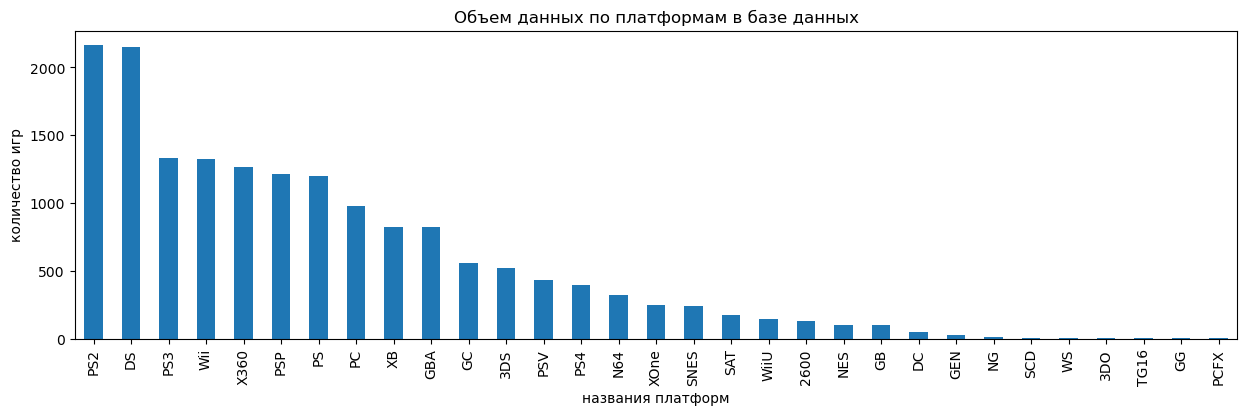

In [19]:
plt.figure(figsize=(15,4))
df['platform'].value_counts().plot(kind='bar', rot=90);
plt.title('Объем данных по платформам в базе данных')
plt.xlabel('названия платформ')
plt.ylabel('количество игр')
plt.show()

Добавлю словарь с данными платформ:

In [20]:
pl_dict = {'2600':['Atari 2600', 'США', 'Atari'], 
'WS':['WonderSwan', 'Япония', 'Bandai '], 
'X360':['Xbox 360', 'США', 'Microsoft'], 
'XB':['Xbox', 'США', 'Microsoft'], 
'XOne':['Xbox One', 'США', 'Microsoft'], 
'PC':['Personal Computer', 'None', 'None'], 
'TG16':['TurboGrafx-16 ', 'Япония', 'NEC'], 
'PCFX':['PC-FX', 'Япония', 'NEC'], 
'DS':['Nintendo DS', 'Япония', 'Nintendo'], 
'Wii':['Nintendo Wii', 'Япония', 'Nintendo'], 
'SNES':['Super Nintendo', 'Япония', 'Nintendo'], 
'GC':['GameCube', 'Япония', 'Nintendo'], 
'3DS':['Nintendo 3DS', 'Япония', 'Nintendo'], 
'N64':['Nintendo 64', 'Япония', 'Nintendo'], 
'WiiU':['Nintendo WiiU', 'Япония', 'Nintendo'], 
'NES':['Nintendo Entertainment System', 'Япония', 'Nintendo'], 
'SCD':['Super Nintendo SCD', 'Япония', 'Nintendo'], 
'SAT':['Sega Saturn', 'Япония', 'Sega'], 
'DC':['Dreamcast', 'Япония', 'Sega'], 
'GEN':['Sega Genesis', 'Япония', 'Sega'], 
'GG':['Game Gear', 'Япония', 'Sega'], 
'NG':['Neo Geo Pocket', 'Япония', 'SNK Playmore '], 
'PS':['PlayStation', 'Япония', 'Sony'], 
'PS2':['PlayStation 2', 'Япония', 'Sony'], 
'PS3':['PlayStation 3', 'Япония', 'Sony'], 
'PS4':['PlayStation 4', 'Япония', 'Sony'], 
'PSP':['PlayStation Portable', 'Япония', 'Sony'], 
'GBA':['Game Boy Advance', 'Япония', 'Sony'], 
'PSV':['PSVita', 'Япония', 'Sony'], 
'GB':['Game Boy', 'Япония', 'Sony'], 
'3DO':['3DO Interactive Multiplayer', 'США', 'The 3DO Company']}

In [21]:
df_pl = pd.DataFrame(pl_dict).T
df_pl = df_pl.reset_index()
df_pl.columns=['platform', 'pl_name', 'country', 'company']
df_pl

,platform,pl_name,country,company
0,2600,Atari 2600,США,Atari
1,WS,WonderSwan,Япония,Bandai
2,X360,Xbox 360,США,Microsoft
3,XB,Xbox,США,Microsoft
4,XOne,Xbox One,США,Microsoft
5,PC,Personal Computer,None,None
6,TG16,TurboGrafx-16,Япония,NEC
7,PCFX,PC-FX,Япония,NEC
8,DS,Nintendo DS,Япония,Nintendo
9,Wii,Nintendo Wii,Япония,Nintendo


In [22]:
df['platform'].isna().sum() # найдем пустые значения

0

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

В данных:<br>

* Всего 16711 строк<br>
* Тип колонки `object`<br>
* Пустых значений нет<br>
* Все значения уникальны<br>
* 2 самых частых значения: `PS2` и `DS`(больше всего создано игр)</div>

### `year` - год выпуска

In [23]:
df['year'].count # общая информация

<bound method Series.count of 0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16706    2016.0
16707    2006.0
16708    2016.0
16709    2003.0
16710    2016.0
Name: year, Length: 16711, dtype: float64>

In [24]:
df['year'] = df['year'].round().astype('Int64') # изменим тип данных с `float64` на `int64`

Количество игр по годам:

In [25]:
df['year'].value_counts().reset_index().sort_values(by='year')

,year,count
36,1980,9
24,1981,46
27,1982,36
30,1983,17
35,1984,14
34,1985,14
28,1986,21
32,1987,16
33,1988,15
29,1989,17


Визуализируем значения:

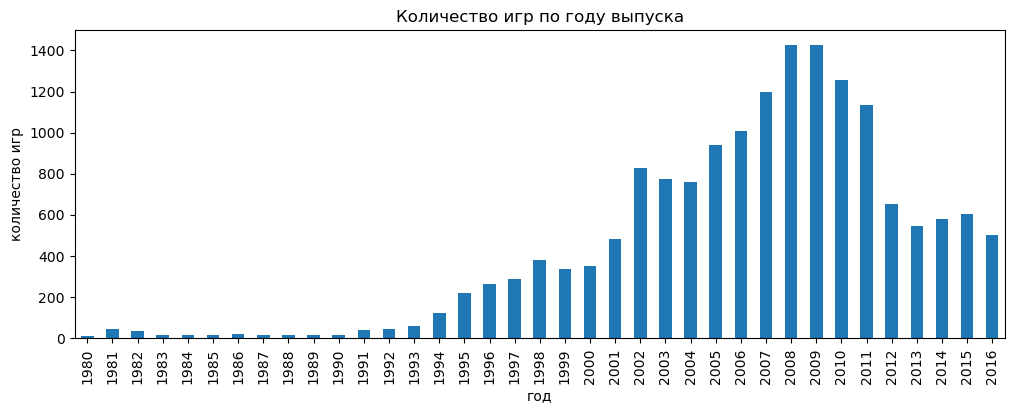

In [26]:
plt.figure(figsize=(12,4))
df['year'].value_counts().sort_index().plot(kind='bar', rot=90)
plt.title('Количество игр по году выпуска')
plt.xlabel('год')
plt.ylabel('количество игр')
plt.show()

Найдем пустые значения:

In [27]:
df['year'].isna().sum()

268

Т.к. пропусков всего 268 (1.61%), можно удалить пустые данные:

In [28]:
df = df.dropna(subset=['year']).reset_index(drop=True)

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

В данных:<br>

* Всего стало 16443 строк<br>
* Тип колонки `Int64`<br>
* Удалили 268 (1.61%) строк с пустыми значениями<br>
* Все значения уникальны c 1980 по 2016<br>
* Основной массив данных начинается начиная с 1994 г<br>
* Максимальное количество данных в районе 2008 года ±3 года</div>

### `genre` - жанр игры

In [29]:
df['genre'].count # общая информация

<bound method Series.count of 0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16438          Action
16439          Sports
16440       Adventure
16441        Platform
16442      Simulation
Name: genre, Length: 16443, dtype: object>

Просмотр уникальных значений:

In [30]:
set(df['genre'].unique())

{'Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'}

Доли жанров в таблице:

In [31]:
pd.DataFrame(df['genre'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

,proportion
genre,
Action,20.11%
Sports,14.02%
Misc,10.47%
Role-Playing,9.01%
Shooter,7.88%
Adventure,7.86%
Racing,7.46%
Platform,5.34%
Simulation,5.21%


Визуализируем значения:

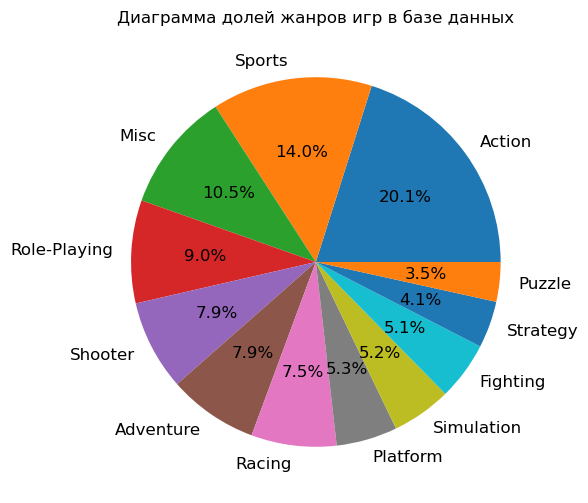

In [32]:
df['genre'].value_counts()\
.plot.pie(autopct='%1.1f%%', figsize=(12,6), title='Диаграмма долей жанров игр в базе данных', fontsize=12)
ax = plt.gca(); ax.axes.yaxis.set_visible(False)
plt.show()

Найдем пустые значения:

In [33]:
df['genre'].isna().sum()

0

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

В данных:<br>

* Всего 16443 строк<br>
* Тип колонки `object`<br>
* Все значения уникальны<br>
* Максимальную долю среди жанров занимают: Action и Sports</div>

### `na` - продажи в Северной Америке
(миллионы проданных копий)

In [34]:
df['na'].count # общая информация

<bound method Series.count of 0        41.36
1        29.08
2        15.68
3        15.61
4        11.27
         ...  
16438     0.00
16439     0.00
16440     0.00
16441     0.01
16442     0.00
Name: na, Length: 16443, dtype: float64>

In [35]:
df['na'].describe().round(2) # посмотрим описательную статистику по продажам

count    16443.00
mean         0.26
std          0.82
min          0.00
25%          0.00
50%          0.08
75%          0.24
max         41.36
Name: na, dtype: float64

Посмотрим на максимальное значение:

In [36]:
df[df['na'] == df['na'].max()]

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Максимальное значение в колонке `na` не сильно отличается от соседних колонок `eu` и `jp`. Говорить, что это "аномалия" - не можем.

Построим гистограмму:

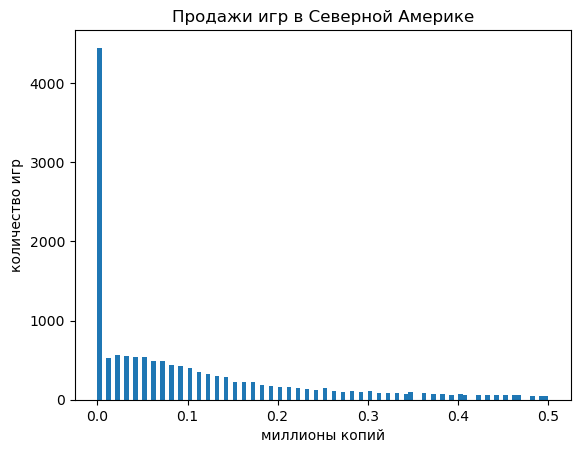

In [37]:
#plt.figure(figsize=(6,4))
plt.hist(df['na'], range=(0,0.5), bins=100)
plt.title('Продажи игр в Северной Америке')
plt.xlabel('миллионы копий')
plt.ylabel('количество игр')
plt.show()

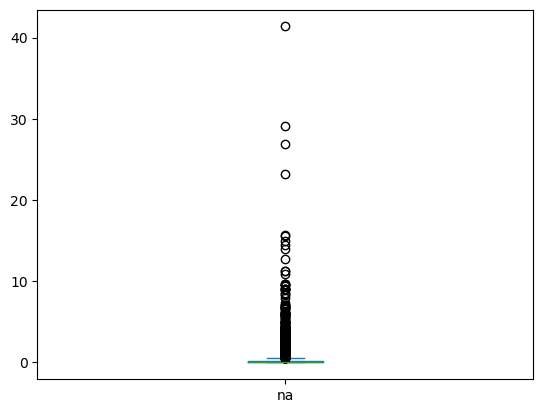

In [38]:
df['na'].plot.box(); # посмотрим на распределения значений

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

В данных:<br>

* Всего 16443 строк<br>
* Тип колонки `float64`<br>
* Максимальное значение 41.36 не сильно отличается от соседних колонок `eu` и `jp`. Говорить, что это "аномалия" - не можем.<br>
* Максимальное количество нулевого значения- нет продаж этой игры</div>

### `eu` - продажи в Европе
(миллионы проданных копий)

In [39]:
df['eu'].count # общая информация

<bound method Series.count of 0        28.96
1         3.58
2        12.76
3        10.93
4         8.89
         ...  
16438     0.00
16439     0.01
16440     0.00
16441     0.00
16442     0.00
Name: eu, Length: 16443, dtype: float64>

In [40]:
df['eu'].describe().round(2) # посмотрим описательную статистику по продажам

count    16443.00
mean         0.15
std          0.51
min          0.00
25%          0.00
50%          0.02
75%          0.11
max         28.96
Name: eu, dtype: float64

Посмотрим на максимальное значение:

In [41]:
df[df['eu'] == df['eu'].max()]

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Максимальное значение в колонке `eu` не сильно отличается от соседних колонок `na` и `jp`. Говорить, что это "аномалия" - не можем.

Построим гистограмму:

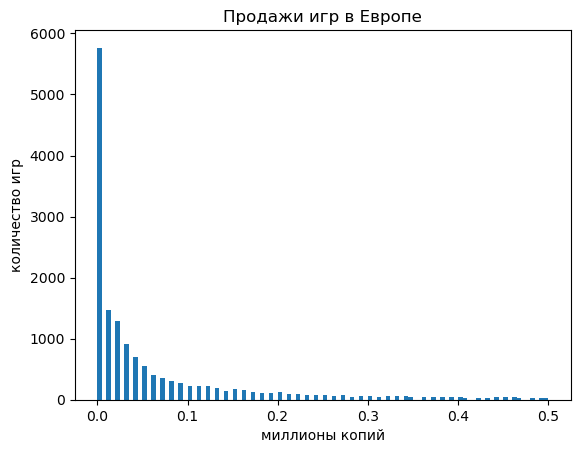

In [42]:
plt.hist(df['eu'], range=(0,0.5), bins=100)
plt.title('Продажи игр в Европе')
plt.xlabel('миллионы копий')
plt.ylabel('количество игр')
plt.show()

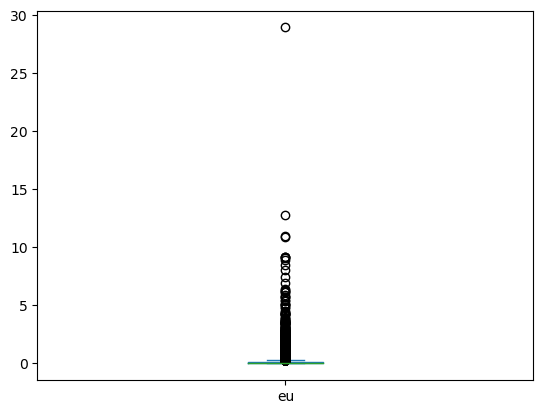

In [43]:
df['eu'].plot.box(); # посмотрим на распределения значений

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

В данных:<br>

* Всего 16443 строк<br>
* Тип колонки `float64`<br>
* Максимальное значение 28.96 не сильно отличается от соседних колонок `na` и `jp`. Говорить, что это "аномалия" - не можем.<br>
* Максимальное количество нулевого значения- нет продаж этой игры</div>

### `jp` - продажи в Японии
(миллионы проданных копий)

In [44]:
df['jp'].count # общая информация

<bound method Series.count of 0         3.77
1         6.81
2         3.79
3         3.28
4        10.22
         ...  
16438     0.01
16439     0.00
16440     0.01
16441     0.00
16442     0.01
Name: jp, Length: 16443, dtype: float64>

In [45]:
df['jp'].describe().round(2) # посмотрим описательную статистику по продажам

count    16443.00
mean         0.08
std          0.31
min          0.00
25%          0.00
50%          0.00
75%          0.04
max         10.22
Name: jp, dtype: float64

Посмотрим на максимальное значение:

In [46]:
df[df['jp'] == df['jp'].max()]

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,NaN


Максимальное значение в колонке `jp` не сильно отличается от соседних колонок `na` и `eu`. Говорить, что это "аномалия" - не можем.

Построим гистограмму:

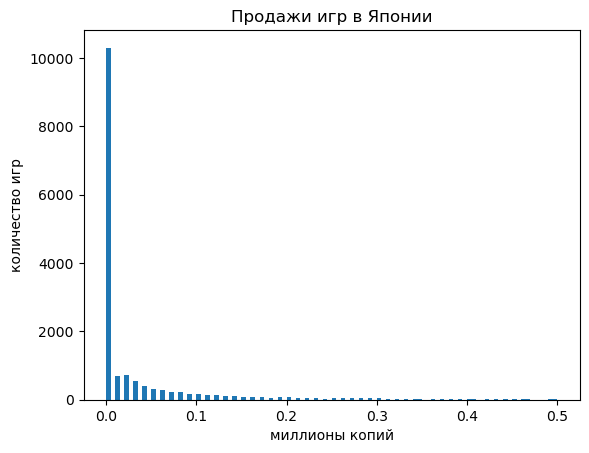

In [47]:
plt.hist(df['jp'], range=(0,0.5), bins=100)
plt.title('Продажи игр в Японии')
plt.xlabel('миллионы копий')
plt.ylabel('количество игр')
plt.show()

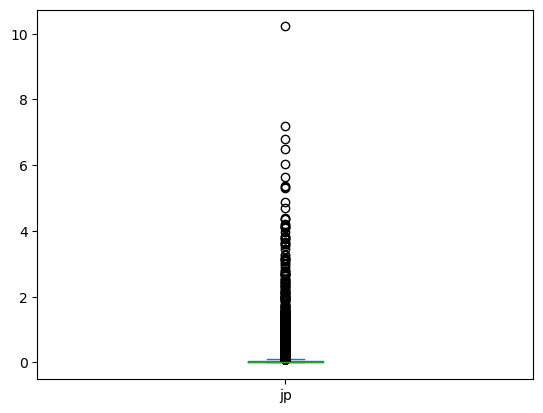

In [48]:
df['jp'].plot.box(); # посмотрим на распределения значений

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

В данных:<br>

* Всего 16443 строк<br>
* Тип колонки `float64`<br>
* Максимальное значение 10.22 не сильно отличается от соседних колонок `na` и `eu`. Говорить, что это "аномалия" - не можем.<br>
* Максимальное количество нулевого значения- нет продаж этой игры</div>

### `other` - продажи в других странах
(миллионы проданных копий)

In [49]:
df['other'].count # общая информация

<bound method Series.count of 0        8.45
1        0.77
2        3.29
3        2.95
4        1.00
         ... 
16438    0.00
16439    0.00
16440    0.00
16441    0.00
16442    0.00
Name: other, Length: 16443, dtype: float64>

In [50]:
df['other'].describe().round(2) # посмотрим описательную статистику по продажам

count    16443.00
mean         0.05
std          0.19
min          0.00
25%          0.00
50%          0.01
75%          0.03
max         10.57
Name: other, dtype: float64

Посмотрим на максимальное значение:

In [51]:
df[df['other'] == df['other'].max()]

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.4,0.41,10.57,95.0,9,M


Максимальное значение в колонке `other` не сильно отличается от соседних колонок `na` и `eu`. Говорить, что это "аномалия" - не можем.

Построим гистограмму:

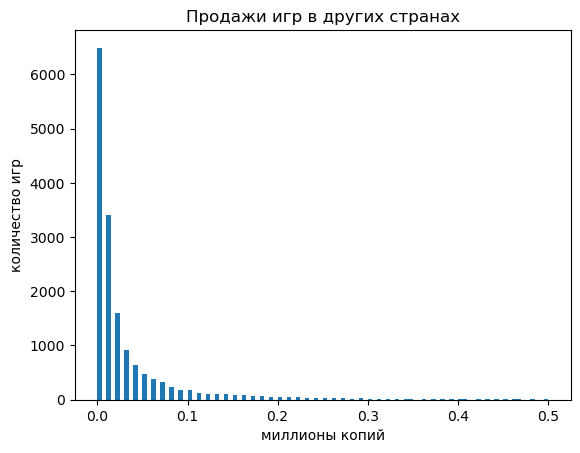

In [52]:
plt.hist(df['other'], range=(0,0.5), bins=100)
plt.title('Продажи игр в других странах')
plt.xlabel('миллионы копий')
plt.ylabel('количество игр')
plt.show()

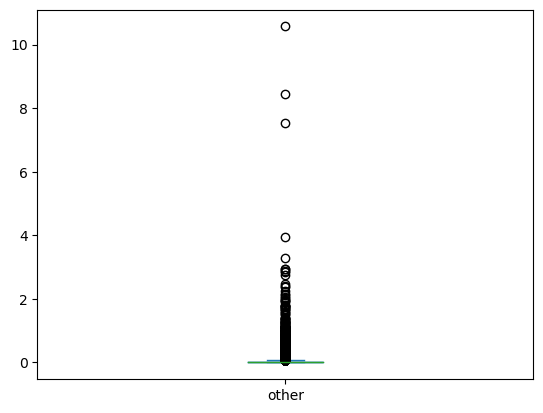

In [53]:
df['other'].plot.box(); # посмотрим на распределения значений

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

В данных:<br>

* Всего 16443 строк<br>
* Тип колонки `float64`<br>
* Максимальное значение 10.57 не сильно отличается от соседних колонок `na` и `eu`. Говорить, что это "аномалия" - не можем.<br>
* Максимальное количество нулевого значения- нет продаж этой игры</div>

### `critic_score` - оценка критиков (максимум 100)

In [54]:
df['critic_score'].count # общая информация

<bound method Series.count of 0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16438     NaN
16439     NaN
16440     NaN
16441     NaN
16442     NaN
Name: critic_score, Length: 16443, dtype: float64>

In [55]:
df['critic_score'].describe().round(2) # посмотрим описательную статистику по рейтингу

count    7982.00
mean       68.99
std        13.92
min        13.00
25%        60.00
50%        71.00
75%        79.00
max        98.00
Name: critic_score, dtype: float64

Пропусков довольно много (51.32%), поэтому удалять пропуски нельзя. Заполнять их медианой или средним можем- это приведет к искажениям при дальнейшем анализе. Т.к. минимальное значение = 13, можем заполнить пропуски значением = 0.

In [56]:
df['critic_score'] = df['critic_score'].fillna(0)

Построим гистограмму без нулевого значения:

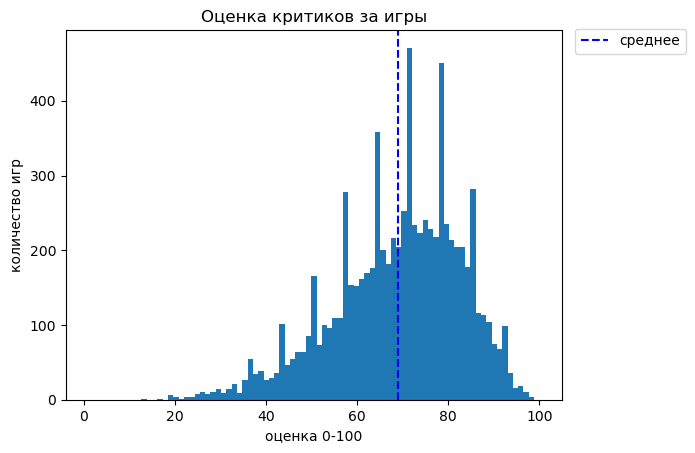

In [57]:
plt.hist(df['critic_score'], range=(1,100), bins=85, label=None)
plt.axvline (x=df.query('critic_score != 0')['critic_score'].mean(), color='blue', linestyle='--', label='среднее')
plt.title('Оценка критиков за игры')
plt.xlabel('оценка 0-100')
plt.ylabel('количество игр')
plt.legend(loc='center right', bbox_to_anchor=(1.25 , 0.97), borderaxespad= 0)
plt.show()

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

В данных:<br>

* Всего 16443 строк<br>
* Тип колонки `float64`<br>
* Все данные укладываются в диапазон 100 единиц. Значения без аномалий<br>
* Средняя оценка критиков: 69<br>
* Основной диапазон оценок от 60 до 79<br>
* Пропусков довольно много (51.32%), т.к. не каждая игра продавалась миллионными тиражами и поэтому ей не ставили рейтинг.<br>
* Заполнили пропуски значением 0</div>

### `user_score` - оценка пользователей (максимум 10)

In [58]:
df['user_score'].count # общая информация

<bound method Series.count of 0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16438    NaN
16439    NaN
16440    NaN
16441    NaN
16442    NaN
Name: user_score, Length: 16443, dtype: object>

Столбец `user_score` имеет тип данных `object`. Посмотрим его содержимое:

In [59]:
df['user_score'].unique() # просмотр уникальных значений

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [60]:
df['user_score'].value_counts() # просмотр уникальных значений и их количества

user_score
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

Есть значения `tbd` - обозначающие, что игра еще не вышла и нет рейтинга. Также есть одно значение = "0".<br>
Заменим `tbd` на значение 0. А также заменим все пропуски NaN тоже на 0.

In [61]:
df['user_score'] = df['user_score'].replace('tbd', 0)

Пропусков довольно много (40.09%), поэтому удалять пропуски нельзя. Заполнять их медианой или средним можем- это приведет к искажениям при дальнейшем анализе. Т.к. минимальное значение = 0 является не существенным, можем заполнить все пропуски значением = 0.

In [62]:
df['user_score'] = df['user_score'].fillna(0)

Теперь можно изменить тип столбца: `user_score` с `object` на `float64`

In [63]:
df['user_score'] = df['user_score'].astype('float')

Посмотрим описательную статистику по рейтингу:

In [64]:
df['user_score'].describe().round(2)

count    16443.00
mean         3.23
std          3.69
min          0.00
25%          0.00
50%          0.00
75%          7.30
max          9.70
Name: user_score, dtype: float64

Построим гистограмму без нулевого значения:

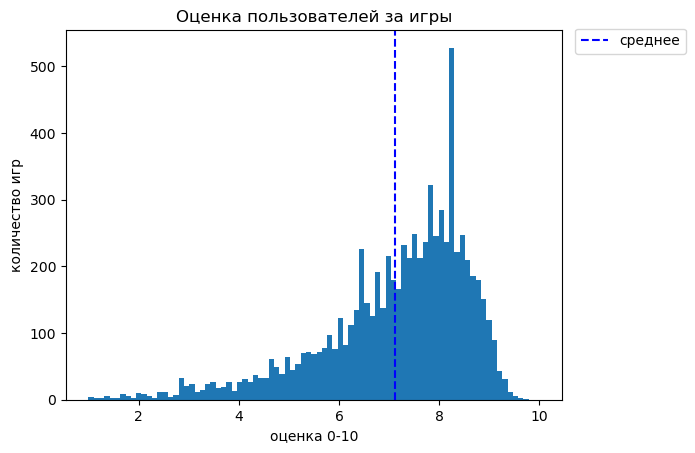

In [65]:
plt.hist(df['user_score'], range=(1,10), bins=85, label=None)
plt.axvline (x=df.query('user_score != 0')['user_score'].mean(), color='blue', linestyle='--', label='среднее')
plt.title('Оценка пользователей за игры')
plt.xlabel('оценка 0-10')
plt.ylabel('количество игр')
plt.legend(loc='center right', bbox_to_anchor=( 1.25 , 0.97 ), borderaxespad= 0)
plt.show()

Посмотрим описательную статистику без нулевого значения:

In [66]:
df.query('user_score != 0')['user_score'].describe().round(2)

count    7461.00
mean        7.13
std         1.50
min         0.20
25%         6.40
50%         7.50
75%         8.20
max         9.70
Name: user_score, dtype: float64

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

В данных:<br>

* Всего 16443 строк<br>
* Тип колонки `float64`<br>
* Все данные укладываются в диапазон 10 единиц. Значения без аномалий<br>
* Пропусков довольно много (40.09%), т.к. не каждая игра была "популярной" и поэтому ей не ставили рейтинг.<br>
* Средняя оценка пользователей: 7.12<br>
* Основной разброс оценок от 6.4 до 8.2<br>
* Имеются нулевые значения, но они не относятся к реальным оценкам<br>
* Пропуски заполнили значением 0</div>

### `rating - рейтинг` от организации ESRB

In [67]:
df['rating'].count # общая информация

<bound method Series.count of 0          E
1        NaN
2          E
3          E
4        NaN
        ... 
16438    NaN
16439    NaN
16440    NaN
16441    NaN
16442    NaN
Name: rating, Length: 16443, dtype: object>

In [68]:
df['rating'].value_counts() # просмотр уникальных значений и их количества

rating
E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

In [69]:
df['rating'].unique() # просмотр уникальных значений

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

> Рейтинг игр ESRB (США, Мексика и Канада)<br>
[Entertainment Software Rating Board](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

- **EC**	- Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.
- **E**	- Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
- **E10+**	- Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
- **T**	- Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
- **M**	- Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.
- **AO**	- Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.
- **RP**	- Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

У нас присутствуют значения nan и K-A.<br>
* <b>nan</b> - пустое значение<br>
* <b>K-A</b> - "Kids to Adults". Тоже самое, что <b>E</b>

Заменим K-A на Е:

In [70]:
df['rating'] = df['rating'].replace('K-A', 'E')

Найдем пустые значения:

In [71]:
df['rating'].isna().sum()

6676

Пропусков довольно много (40.48%), поэтому мы не можем просто удалить их. Поэтому заполним все пропуски значением `unknown`:

In [72]:
df['rating'] = df['rating'].fillna('Unknown')

Визуализируем значения:

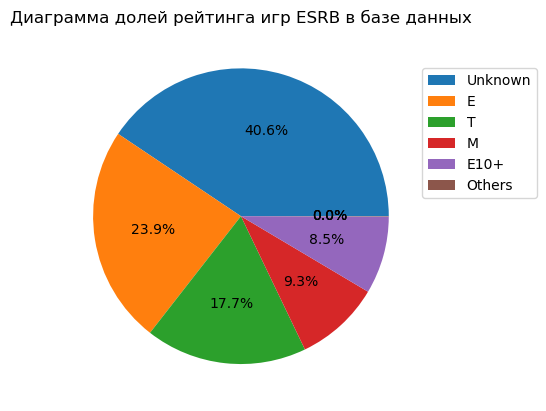

In [73]:
x = df['rating'].value_counts().head(5).index.to_list()
x.append('Others')
df['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.legend(x, loc='upper right', bbox_to_anchor=(1.3, 0.9), borderaxespad= 0)
plt.title('Диаграмма долей рейтинга игр ESRB в базе данных')
ax = plt.gca(); ax.axes.yaxis.set_visible(False)
plt.show()

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

В данных:<br>

* Всего 16443 строк<br>
* Тип колонки `object`<br>
* Используется рейтинг игр ESRB<br>
* Пропусков довольно много (40.48%) - не каждой игре был проставлен рейтинг<br>
* Пропуски заполнили значением `Unknown`</div>

### `total` - суммарные продажи по миру

Создадим новую колонку `total`, в которую запишем суммарные продажи по миру:

In [74]:
df['total'] = df[['na', 'eu', 'jp', 'other']].sum(axis = 1)

In [75]:
df['total'].describe().round(2) # посмотрим описательную статистику по продажам

count    16443.00
mean         0.54
std          1.56
min          0.00
25%          0.06
50%          0.17
75%          0.47
max         82.54
Name: total, dtype: float64

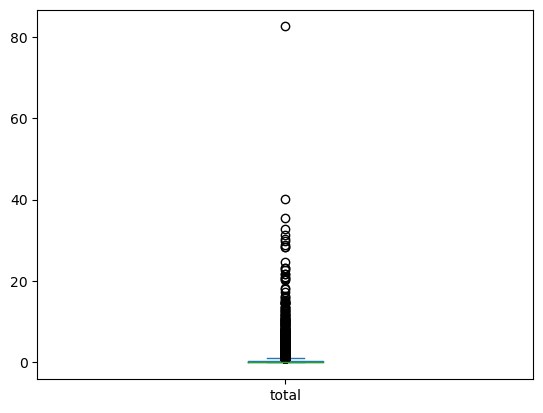

In [76]:
df['total'].plot.box(); # посмотрим на распределения значений

Построим гистограмму с диапазоном до 10 (млн.копий игр):

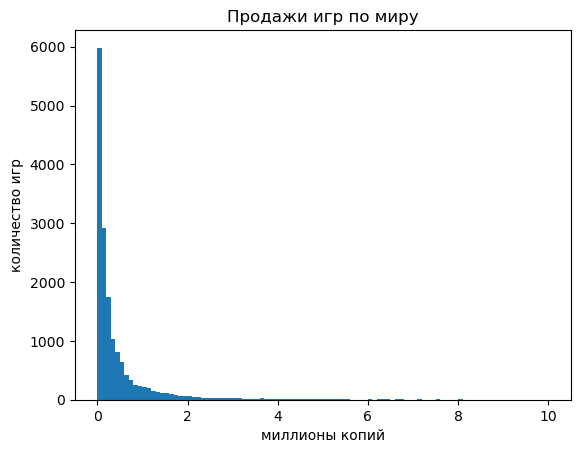

In [77]:
plt.hist(df['total'], range=(0,10), bins=100)
plt.title('Продажи игр по миру')
plt.xlabel('миллионы копий')
plt.ylabel('количество игр')
plt.show()

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

В данных:<br>

* Максимальное значение количества продаж ожидаемо в районе 0<br>
* Тип гистограммы продаж: "распределение Парето" c длинных хвостом в районе 2 млн.копий</div>

### <b>Вывод</b> 🔉

In [78]:
df.head(10) # отображение данных, подготовленных к анализу

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,Unknown,28.31


In [79]:
df.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16443 non-null  object 
 1   platform      16443 non-null  object 
 2   year          16443 non-null  Int64  
 3   genre         16443 non-null  object 
 4   na            16443 non-null  float64
 5   eu            16443 non-null  float64
 6   jp            16443 non-null  float64
 7   other         16443 non-null  float64
 8   critic_score  16443 non-null  float64
 9   user_score    16443 non-null  float64
 10  rating        16443 non-null  object 
 11  total         16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


In [80]:
df.isna().agg({sum}) # проверим на наличие пропусков данных

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
sum,0,0,0,0,0,0,0,0,0,0,0,0


<div style="border:solid SteelBlue 3px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

* Удалили 2 дублирующиеся игры<br>
* Изменили типы данных колонки `year` на `Int64` и у колонки `user_score` на `float64`<br>
* Пустые значения колонок `critic_score`, `user_score` и `rating` заполнили пропуски значением = 0<br>
* Удалили 271 строку (1.61%) несущественных данных, имеющих строки с пустыми значениями<br>
* Пропуски `rating` заполнили значением Unknown<br>
* Года выпуска игр c 1980 по 2016 г<br>
* Основной массив данных начинается начиная с 1994 г<br>
* 2 самых частых значения: PS2 и DS<br>
* Максимальное количество данных в районе 2008 года ±3 года<br>
* Максимальную долю среди жанров занимают: Action и Sports<br>
* Средняя оценка критиков: 69. Основной диапазон оценок от 60 до 79<br>
* Средняя оценка пользователей: 7.12. Основной разброс оценок от 6.4 до 8.2<br>
* Распределение продаж игр по миру можно описать "распределением Парето", c длинных хвостом в районе 2 млн.копий
</div>

## 3️⃣ Исследовательский анализ данных

> Обзор поколений консолей, включая дублирование поколений. Для каждой из них приведены основные консоли каждого поколения
[Википедия: Поколения домашних игровых систем](https://ru.wikipedia.org/wiki/Поколения_домашних_игровых_систем)

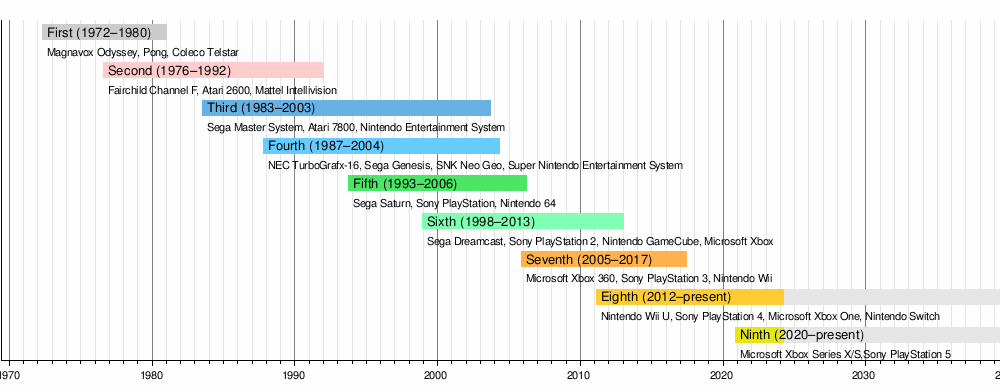

### Исследование количества игр, выпускаемых в разные года

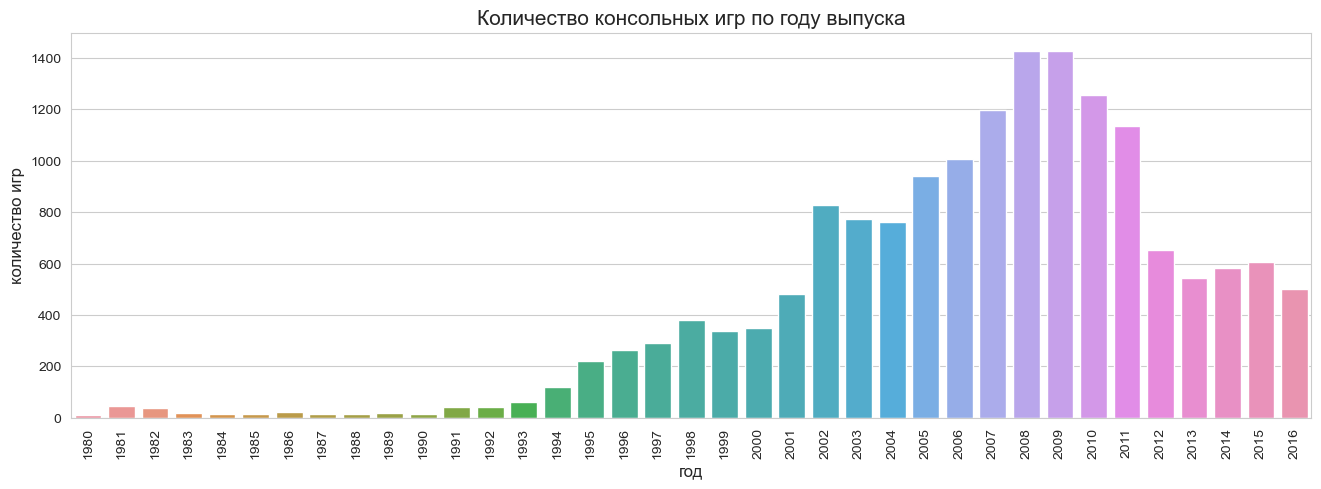

In [81]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 5))
sns.countplot(data = df, x='year');
plt.xticks(rotation=90)
plt.title('Количество консольных игр по году выпуска', fontsize=15)
plt.xlabel('год', fontsize=12)
plt.ylabel('количество игр', fontsize=12);

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

<b>Вывод:</b><br>

* С 1980 по 2016 данные по количеству консольных игр<br>
* С 1993 г., с появлением домаших игровых систем 5-поколения (Sega Saturn, Sony PlayStation2, Nintendo 64) наблюдается динамика основного роста<br>
* Данные до 1993 г. можно не анализировать<br>
* 2008-2009 гг. - максимум количества созданных игр<br>
* Резкое падение до 2012 года и постепенное падение.
    
<b>С чем может быть связано резкое падение созданных игр для консольных систем, начиная с 2008-2009 годов?</b><br>
1. c 2007 г. появляется первый смартфон iphone, android. Появление App Store и бурное начало создания игр для телефонов. Первыми исчезли мини-консоли с экраном (GameBoy, Nintendo DS, Game Gear)<br>
2. с 2008 г. финансовый кризис, который ударил по банковской сфере и задел игровую индустрию. Доля капитализации крупных игроков (например Electronic Arts, Activision Blizzard, Take-Two, THQ, Gamestop и Nintendo) упала до 50%<br>
3. с 2008 г. активный рост онлайн-сервисов цифрового распространения компьютерных игр и программ, таких как Steam. Что привело к переходу пользователей на ПК<br>
4. с ростом производительности консолей игры, постепенно перешли в 3D-формат, что потребовало больших финансовых вложений и времени на производство игр.

<b>Перспективы:</b>
* на текущий момент стоит обратить внимание на игровые системы 9-поколения (Microsoft Xbox Series X/S, Sony PlayStation 5)<br>
* есть некоторые перспективы у игр на платформах PC (персональный компьютер). Однако с развитием онлайн-сервисов, облачных технологий и подписок- пользователи напрямую взаимодействуют с производителями игр.<br>
* с учетом тенденции падения предложений и спроса домашних игровых систем, начиная с 2012 года, рынок находится в стагнации.</div>

### Исследование продаж по платформам
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

#### Тепловая карта продаж игровых платформ

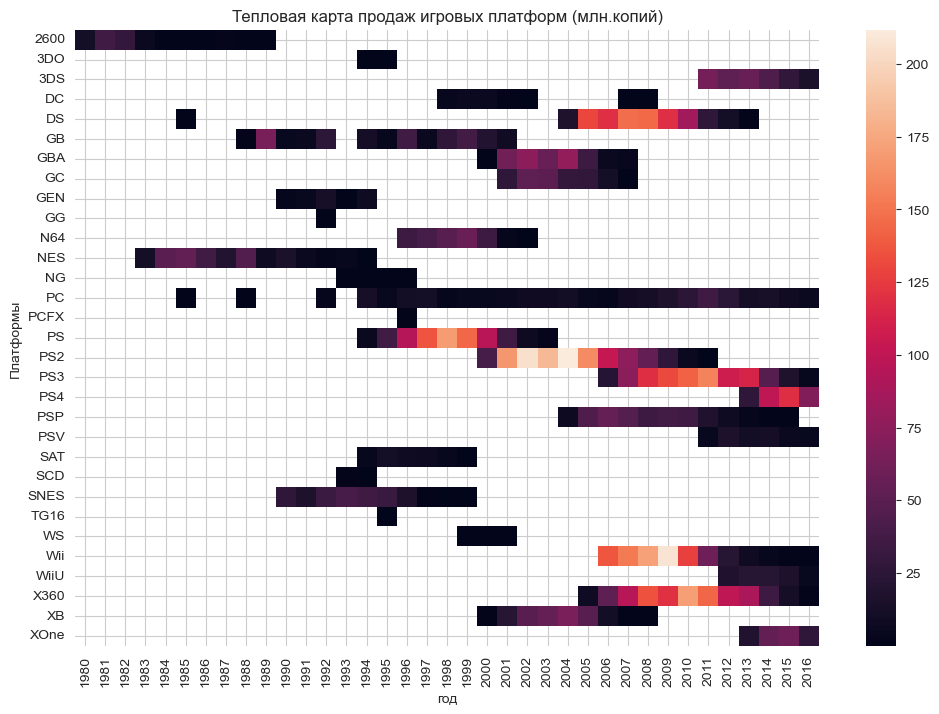

In [82]:
df_heatmap = df.pivot_table(index='year', columns='platform', values='total', aggfunc='sum')\
.sort_values(by='year', ascending=True)
plt.figure(figsize=(12,8))
ax = sns.heatmap(df_heatmap.T)
ax.set(title='Тепловая карта продаж игровых платформ (млн.копий)'); 
ax.set(xlabel='год', ylabel='Платформы');

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

* Мы видим, что в основном платформы имеют какой-то "жизненный" цикл появления, существования и исчезновений (начала продаж, основных продаж и их окончания)
* В некоторых платформах есть временные разбросы на несколько блоков.
</div>

#### Поиск аномалий

Выявим аномалии, которые увидели в предыдущем пункте тепловой карты:

1. DC - два куска с перерывом в 5 лет
2. DS - отдельное значение в 1984 г
3. PC - 3 отдельных значения и "аномальное" время продаж



**1. DC два куска с перерывом в 5 лет:**

In [83]:
df.query('platform == "DC"').sort_values(by='year').head(3)

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
637,Sonic Adventure,DC,1998,Platform,1.26,0.61,0.46,0.08,0.0,0.0,Unknown,2.41
8913,Power Stone,DC,1998,Fighting,0.00,0.00,0.14,0.00,0.0,0.0,Unknown,0.14
11204,Godzilla Generations,DC,1998,Action,0.00,0.00,0.08,0.00,0.0,0.0,Unknown,0.08


Игры реальные. Платформа DC- приставка Dreamcast (Sega) 1998-2001 гг. Посмотрим второй блок:

In [84]:
df.query('platform == "DC"').sort_values(by='year').tail()

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
9512,Capcom vs. SNK 2: Millionaire Fighting 2001,DC,2001,Fighting,0.0,0.0,0.12,0.0,0.0,0.0,Unknown,0.12
5435,Sakura Wars 3: Paris wa Moeteiru ka,DC,2001,Adventure,0.0,0.0,0.33,0.0,0.0,0.0,Unknown,0.33
5951,"Sakura Wars 4: Koi Seyo,Otome",DC,2002,Adventure,0.0,0.0,0.29,0.0,0.0,0.0,Unknown,0.29
15743,Triggerheart Exelica,DC,2007,Shooter,0.0,0.0,0.02,0.0,0.0,0.0,Unknown,0.02
13787,Pia Carrot e Youkoso!! 2.5,DC,2008,Adventure,0.0,0.0,0.04,0.0,0.0,0.0,Unknown,0.04


Две игры: "Triggerheart Exelica" и "Pia Carrot e Youkoso!! 2.5" (данные из википедии) не поддерживались на платформе DC, но обе поддерживались на PS2. Поэтому поменяем им значение платформы

In [85]:
df.at [13787, 'platform'] = "PS2"
df.at [15743, 'platform'] = "PS2"

**2. DS отдельное значение в 1984 г**

In [86]:
df.query('platform == "DS"').sort_values(by='year').head()

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.0,0.0,0.0,Unknown,0.02
13253,Cocoto Kart Racer,DS,2004,Racing,0.04,0.00,0.00,0.0,0.0,0.0,E,0.04
11339,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.0,0.0,0.0,Unknown,0.08
4360,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.0,0.0,0.0,Unknown,0.43
7778,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.0,0.0,0.0,Unknown,0.19


"Strongest Tokyo University Shogi DS"- это реальная игра, выпущенная в 1985 г., разработчик:  Mainichi Communications. На платформе Nintendo DS. Однако Nintendo DS появилась только в 2004 году. Продажи только по Японии.<br>
Думаю это аномалия и ее можно удалить.

In [87]:
df = df.query('name != "Strongest Tokyo University Shogi DS"')

**3. PC - 3 отдельных значения и "аномально" длительное жизни платформы**

In [88]:
df.query('platform == "PC"').sort_values(by='year')

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
14241,Alter Ego,PC,1985,Simulation,0.00,0.03,0.0,0.01,59.0,5.8,T,0.04
14390,SimCity,PC,1988,Simulation,0.00,0.02,0.0,0.01,64.0,2.2,E10+,0.03
759,SimCity 2000,PC,1992,Simulation,1.20,0.84,0.0,0.10,0.0,0.0,Unknown,2.14
2575,The 7th Guest,PC,1992,Adventure,0.02,0.77,0.0,0.00,0.0,0.0,T,0.79
12452,Syndicate,PC,1992,Strategy,0.00,0.05,0.0,0.01,0.0,0.0,Unknown,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...
14113,Deus Ex: Mankind Divided,PC,2016,Role-Playing,0.00,0.03,0.0,0.00,83.0,6.1,M,0.03
10794,Football Manager 2017,PC,2016,Simulation,0.00,0.09,0.0,0.01,81.0,4.3,E,0.10
14147,Song of the Deep,PC,2016,Action,0.03,0.00,0.0,0.00,73.0,6.3,E,0.03
16154,Cities: Skylines Snowfall,PC,2016,Simulation,0.00,0.01,0.0,0.00,72.0,7.1,Unknown,0.01


Судя по данным (сильный разброс, пропуски, самое длительное время)- можно сказать, что "платформа PC" это не консольные системы, а краткое обозначение Personal Computer. И игры создавались для операционных систем: MS-DOS, Windows, Unix.

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

1. Изменили тип платформы для 2 игр
2. Удалили игру как "аномалию"
3. Платформа <b>PC</b>- это не консольная "платформа", а персональный компьютер.
</div>

#### Среднее время жизни платформ

In [89]:
life_pl = df.pivot_table(index='platform', values='year', aggfunc=['min', 'max']).reset_index()
life_pl.columns = ['platform', 'min_year', 'max_year']
life_pl['diff'] = life_pl['max_year'] - life_pl['min_year']
life_pl['diff'].describe().round()

count    31.0
mean      7.0
std       6.0
min       0.0
25%       3.0
50%       6.0
75%      10.0
max      31.0
Name: diff, dtype: Float64

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

* Среднее время "жизни" игровых платформ- 7 лет
* Медианное- 6 лет.
</div>

#### Основные платформы с 1993 года, ТОП-10

Т.к. данные до 1993 года малозначимы, отобразим платформы, начиная с 1993 г. и их сумму продаж:

In [90]:
pl_total = df[df['year'] >= 1993].pivot_table(index='platform', values='total', aggfunc='sum')\
.sort_values(by='total', ascending=False)
pl_total

,total
platform,
PS2,1233.62
X360,961.24
PS3,931.82
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Выберем список из 10 популярных платформ (по сумме продаж):

In [91]:
pl_list = pl_total.head(10).index.to_list()
pl_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Построим датафрейм по 10 популярным платформам после 1993 г:

In [92]:
pl_top10 = df[df['year'] >= 1993].query('platform == @pl_list')\
.pivot_table(index='year', columns='platform', values='total', aggfunc='sum').sort_values(by='year', ascending=True)
pl_top10

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year,,,,,,,,,,
1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,74.16,6.67,205.38,NaN,NaN,NaN,NaN,NaN


Посмотрим графики:

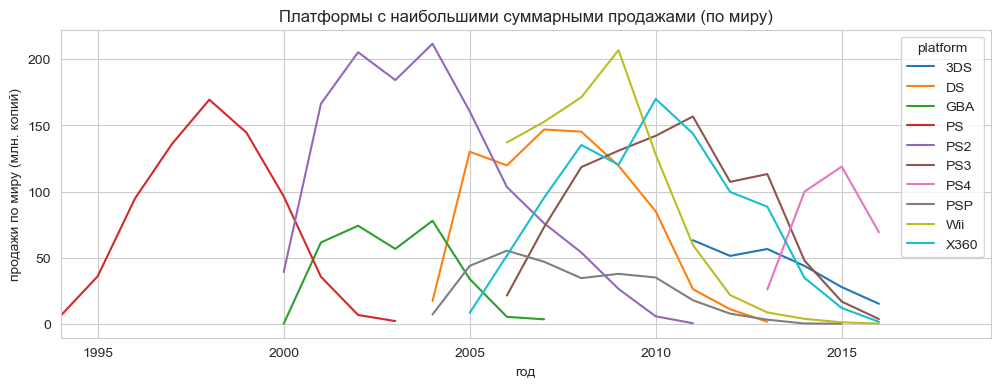

In [93]:
pl_top10.plot(grid=True, figsize=(12,4), style ='-')
plt.xlim(1994, 2019)
plt.title('Платформы с наибольшими суммарными продажами (по миру)')
plt.xlabel('год')
plt.ylabel('продажи по миру (млн. копий)')
plt.show()

Сравним с глобальной платформой данных и бизнес-аналитики (Statista):

> [Best-Selling Console of All Time, Feb 26, 2013](https://www.statista.com/chart/937/best-selling-video-game-home-consoles/)

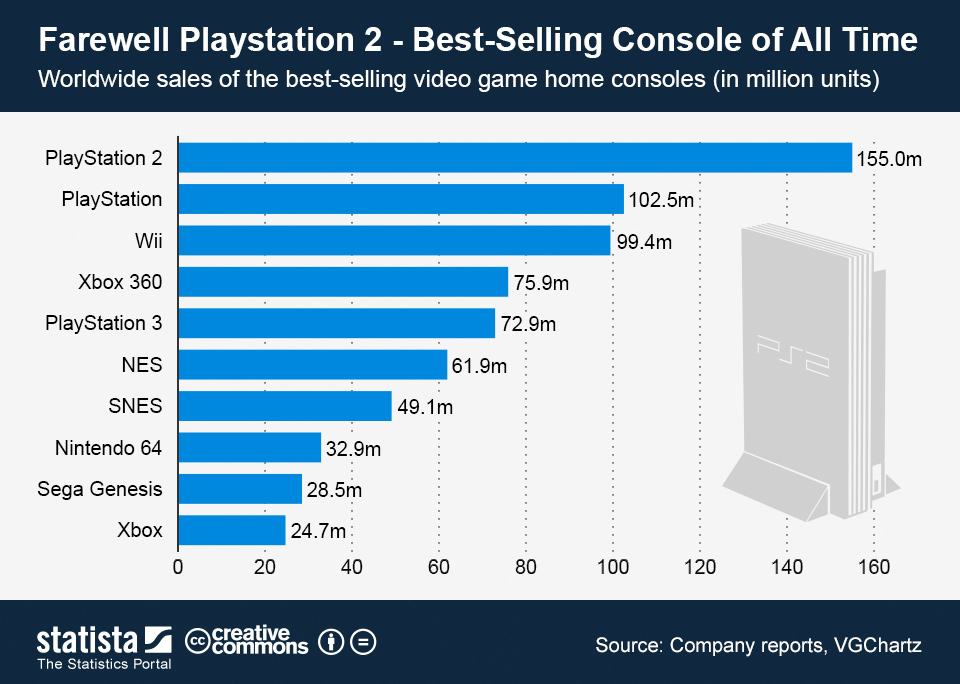

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

* Имеющиеся данные совпадают со статистикой глобальной платформой данных и бизнес-аналитики (Statista)<br>
* 6 самых популярных платформ (по количеству продаж игр, млн.копий):<br>
    - PS2	- 1233.62
    - X360	- 961.24
    - PS3	- 931.34
    - Wii	- 891.18
    - DS	- 802.76
    - PS	- 727.58
* Среднее время "жизни" популярных игровых платформ (по графику) ~ до 10 лет<br>
* 10 лет- совпадает с периодами "поколений" домашних игровых систем и переходом на новый уровень<br>
* 2008-2009 гг. - максимум количества платформ<br>
* С 2009 г. падение продаж на все игровые платформы "6-7 поколения"

### Исследование перспективных платформ, прогноз на 2017 г.

Для анализа "перспективных" платформ надо смотреть игровые системы 8 поколения и наработки крупных производителей (Sony, Nintendo, Microsoft). Для анализа ближайших перспектив возьмем половину от срока жизни "платформ" в 5 лет и посмотрим на продажи:

In [94]:
pl_total5 = df[df['year'] > 2011]\
.pivot_table(index='platform', values='total', aggfunc='sum').sort_values(by='total', ascending=False)
pl_list = pl_total5.head(10).index.to_list()
pl_top5 = df[df['year'] > 2011].query('platform == @pl_list')\
.pivot_table(index='year', columns='platform', values='total', aggfunc='sum').sort_values(by='year', ascending=True)
pl_top5

platform,3DS,DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


Построим график:

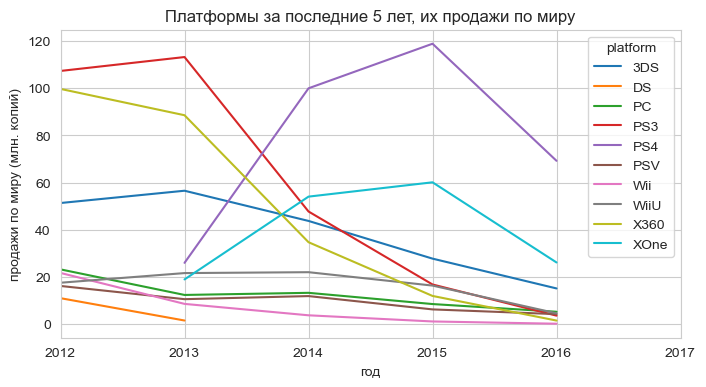

In [95]:
pl_top5.plot(grid=True, figsize=(8,4), style ='-')
plt.xlim(2012, 2017)
plt.title('Платформы за последние 5 лет, их продажи по миру')
plt.xlabel('год')
plt.ylabel('продажи по миру (млн. копий)')
plt.show()

Составим список "перспективных платформ" на 2016 г:

In [96]:
pl_list_top5 = df[df['year'] == 2016]\
.pivot_table(index='platform', values='total', aggfunc='sum').sort_values(by='total', ascending=False)
pl_list_top5.head(5).index.to_list()

['PS4', 'XOne', '3DS', 'PC', 'WiiU']

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">

<b>Прогноз на 2017 год и дальше:</b><br>

* Игровые платформы 6-7 поколения практически исчезнут (PS3, PSV, X360, 3DS, Wii, WiiU, PC)<br>
* 3DS (Nintendo 3DS) несмотря на 3 место в списке, является портативной игровой консолью. В сравнении со смартфонами у нее нет перспектив. (* 17 сентября 2020 года Nintendo сообщила, что производство New Nintendo 2DS XL и линейки Nintendo 3DS было прекращено. [Газета The New York Times связала снижение финансовых прогнозов на 2014 год со слабыми продажами аппаратного обеспечения по сравнению с мобильными играми](https://www.nytimes.com/2014/01/18/technology/resisting-mobile-hurts-nintendos-bottom-line.html?_r=0))<br>
* Данные на 2016 г. могут быть не полными, поэтому говорить о падении продаж преждевременно<br>
* С 2013 г., появление PS4 (Sony PlayStation 4) и XOne (Microsoft Xbox One)- платформы "8 поколения", которые будут в тренде ~10 лет, до 2023 г.<br>
* Примерное время появления платформ семейства Sony PlayStation (PS, PS2, PS3, PS4) ~ 6-7 лет. В данных не отражено появление PlayStation 5. Из расчета появления PS4 в 2013 году, + 6-7 лет, выходит что PS5 должна выйти ~ 2019 - 2020 г.
* Глобальные тенденции рынка игровых консолей- падение спроса и предложения 🔻, а значит малоперспективные</div>

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

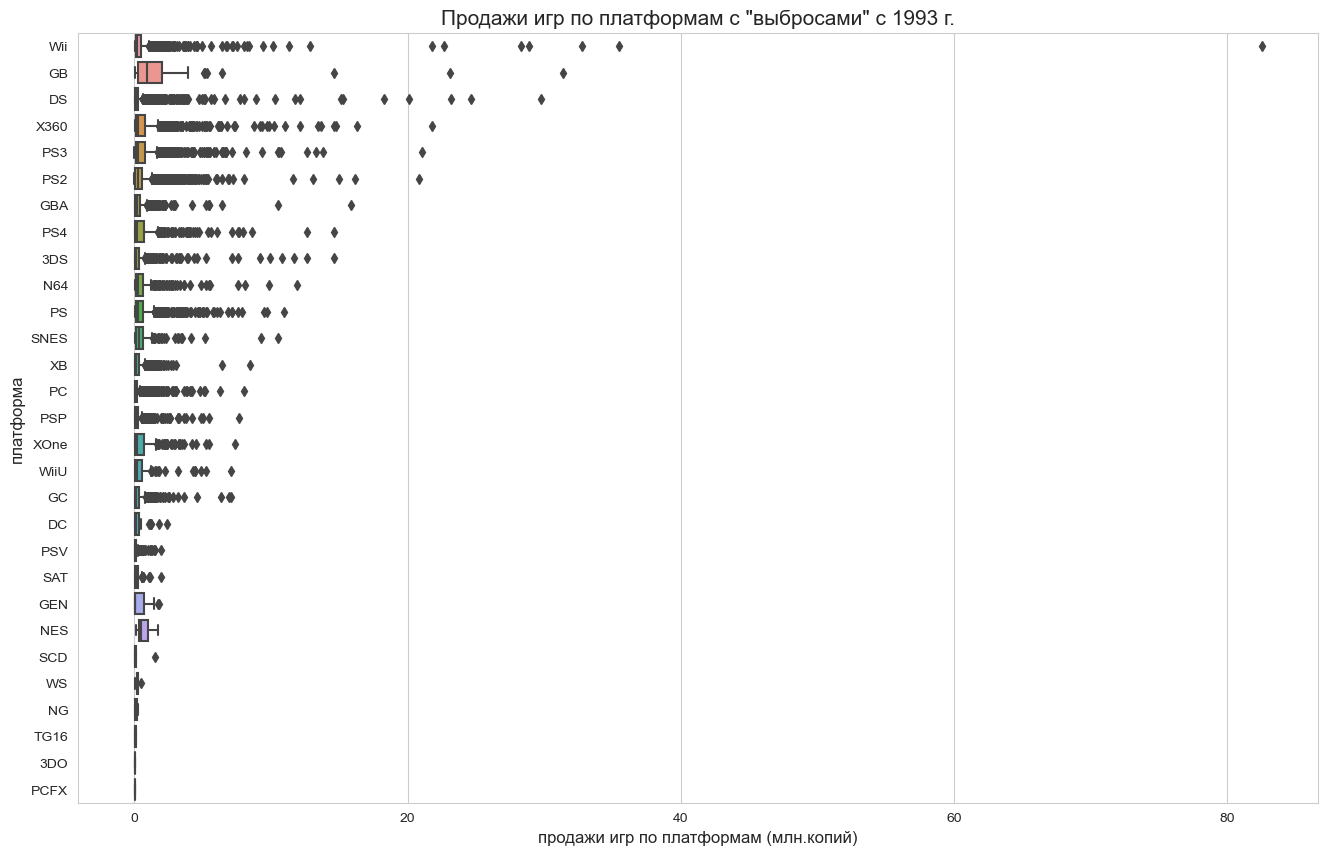

In [97]:
plt.figure(figsize=(16,10))
#sns.set_theme(style='ticks', palette='pastel')
sns.boxplot(data=df[df['year'] >= 1993], x='total', y='platform')
#sns.despine(offset=10, trim=True)
plt.title('Продажи игр по платформам с "выбросами" с 1993 г.', fontsize=15)
plt.xlabel('продажи игр по платформам (млн.копий)', fontsize=12)
plt.ylabel('платформа',fontsize=12);

In [98]:
df[df['name'] == "Wii Sports"] # самая успешная консольная игра с "выбросом" в 80 млн.копий игры

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


**Посмотрим в другом масштабе. Выберем ТОП-10 платформ, с 2014 г.:**

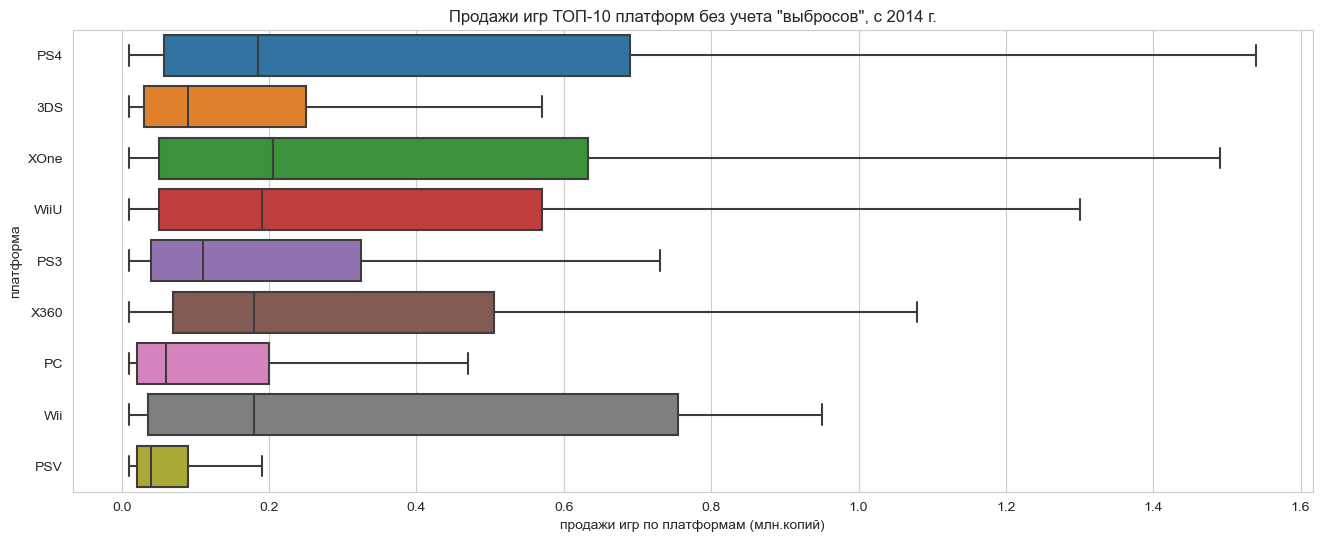

In [99]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df[df['year'] >= 2014].query('platform == @pl_list'), x='total', y='platform', showfliers=False)
plt.title('Продажи игр ТОП-10 платформ без учета "выбросов", с 2014 г.')
plt.xlabel('продажи игр по платформам (млн.копий)')
plt.ylabel('платформа');

Список "перспективных платформ" на 2017 г:

In [100]:
pl_list_top5.head(5).index.to_list()

['PS4', 'XOne', '3DS', 'PC', 'WiiU']

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

* Ожидаемо все значения "ящиков" и их медианы близки к нулю, т.к. количество продаж для платформ описывается "распределением Парето"<br>
* Больший интерес представляют "выбросы"- наиболее популярные игры этих платформ. Какие жанры, в какие годы<br>
* Максимальные показатели продаж у платформы Nintendo Wii. Рекорд у игры Wii Sports, 2006 г.
* Искать с сравнивать медианы - не целесообразно, т.к. каждая игра уникальна (со своим жанром, независимыми продажами и оценкой критиков)<br>
* Хорошие продажи (c 2011 г.) показывают платформы: `X360`, `PS3`, `PS4`, `XOne` и `Wii`<br>
* Потенциально прибыльные платформы на 2017 г.: `PC` (персональный компьютер), `PS4`, `XOne`.
</div>

### Влияние отзывов критиков и пользователей на продажи внутри одной популярной платформы
Посчитаем корреляцию между отзывами и продажами, построим диаграмму рассеяния

**По данным продаж, самой популярной платформой можно считать "PS2" - 1233.62 млн.проданных копий игр**

#### `PS2` - самая популярная платформа

##### Оценки критиков

**Убираем нулевые оценки критиков (т.к. мы их устанавливали)**

In [101]:
ps2_critic = df.query('platform == "PS2" and critic_score != 0')
ps2_critic.head()

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65


**Коэффициент корреляции Пирсона по оценке критиков:**

In [102]:
ps2_critic['critic_score'].corr(ps2_critic['total']).round(2) # оценки критиков vs продажи

0.39

**Построим график оценки критиков:**

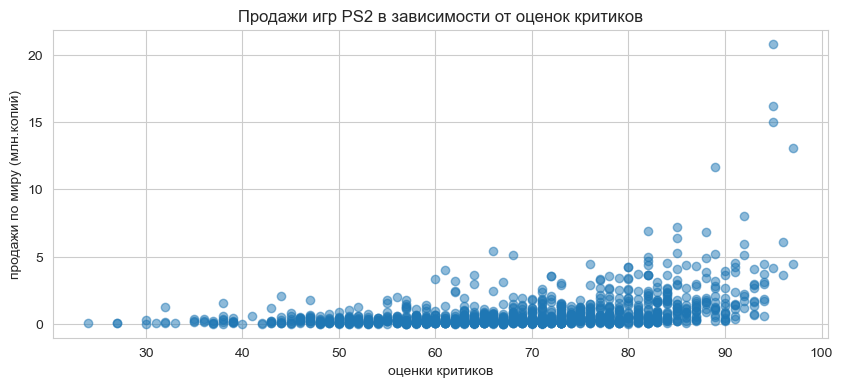

In [103]:
plt.figure(figsize=(10,4))
plt.plot(ps2_critic['critic_score'], ps2_critic['total'], 'o', alpha=0.5)
plt.title('Продажи игр PS2 в зависимости от оценок критиков')
plt.xlabel('оценки критиков')
plt.ylabel('продажи по миру (млн.копий)')
plt.show();

##### Оценки пользователей

**Убираем нулевые оценки пользователей (т.к. мы их устанавливали):**

In [104]:
ps2_user = df.query('platform == "PS2" and user_score != 0') # срез по платформе PS2 и оценки пользователей
ps2_user.head()

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65


**Коэффициент корреляции Пирсона оценки пользователей:**

In [105]:
ps2_user['user_score'].corr(ps2_user['total']).round(2) # оценки пользователей vs продажи

0.18

**Построим график оценки пользователей:**

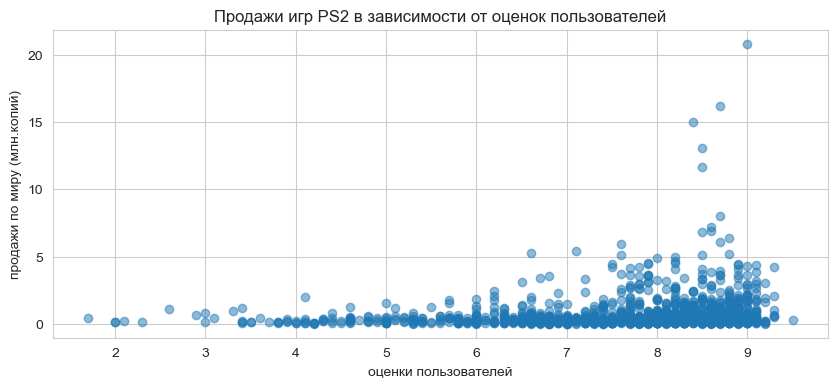

In [106]:
plt.figure(figsize=(10,4))
plt.plot(ps2_user['user_score'], ps2_user['total'], 'o', alpha=0.5)
plt.title('Продажи игр PS2 в зависимости от оценок пользователей')
plt.xlabel('оценки пользователей')
plt.ylabel('продажи по миру (млн.копий)')
plt.show();

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

<b>Для PS2:</b><br>
* Корреляция оценок критиков с продажами минимальна<br>
* Корреляция оценок пользователей с продажами отсутствует<br>
* Взаимосвязи хорошо видны на максимальных оценках- при отличной оценке может быть как много продаж, так и мало<br>
* Но тем не менее только при высоких оценках наблюдаются высокие продажи.<br>
* Поэтому лучше иметь максимальную оценку от критиков- тогда больше шансов получить больше продаж
</div>

#### `PS4` - перспективная платформа на 2016 г.

##### Оценки критиков 

**Убираем нулевые оценки критиков (т.к. мы их устанавливали)**

In [107]:
ps4_critic = df.query('platform == "PS4" and critic_score != 0')
ps4_critic.head()

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


**Коэффициент корреляции Пирсона по оценке критиков:**

In [108]:
ps4_critic['critic_score'].corr(ps4_critic['total']).round(2) # оценки критиков vs продажи

0.41

**Построим график оценки критиков:**

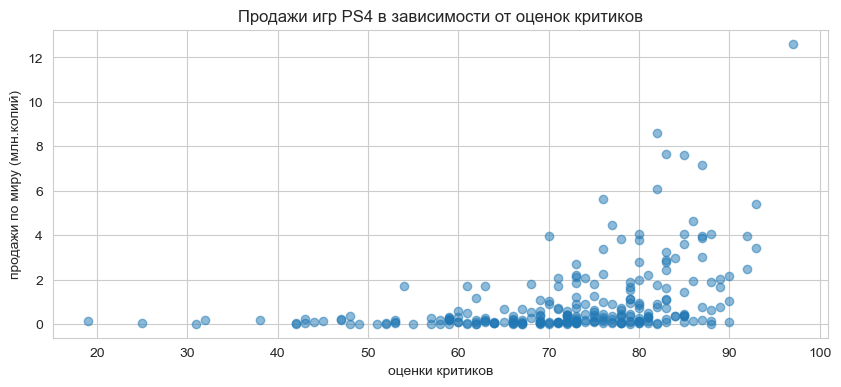

In [109]:
plt.figure(figsize=(10,4))
plt.plot(ps4_critic['critic_score'], ps4_critic['total'], 'o', alpha=0.5)
plt.title('Продажи игр PS4 в зависимости от оценок критиков')
plt.xlabel('оценки критиков')
plt.ylabel('продажи по миру (млн.копий)')
plt.show();

##### Оценки пользователей

**Убираем нулевые оценки пользователей (т.к. мы их устанавливали):**

In [110]:
ps4_user = df.query('platform == "PS4" and user_score != 0') # срез по платформе PS4 и оценки пользователей
ps4_user.head()

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


**Коэффициент корреляции Пирсона оценки пользователей:**

In [111]:
ps4_user['user_score'].corr(ps4_user['total']).round(2) # оценки пользователей vs продажи

-0.03

**Построим график оценки пользователей:**

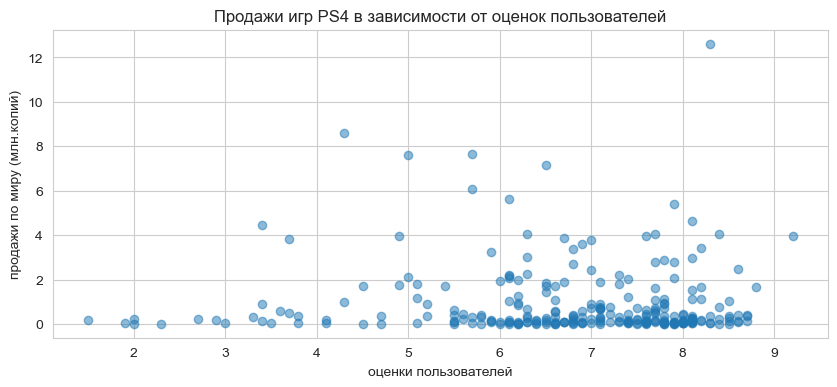

In [112]:
plt.figure(figsize=(10,4))
plt.plot(ps4_user['user_score'], ps4_user['total'], 'o', alpha=0.5)
plt.title('Продажи игр PS4 в зависимости от оценок пользователей')
plt.xlabel('оценки пользователей')
plt.ylabel('продажи по миру (млн.копий)')
plt.show();

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

<b>Для PS4:</b><br>
* Корреляция оценок критиков с продажами минимальна<br>
* Корреляция оценок пользователей с продажами отсутствует<br>
* Взаимосвязи хорошо видны на максимальных оценках- при отличной оценке может быть как много продаж, так и мало<br>
* Но тем не менее только при высоких оценках наблюдаются высокие продажи.<br>
* Поэтому лучше иметь максимальную оценку от критиков- тогда больше шансов получить больше продаж
</div>

### Оценки критиков и пользователей других популярных платформ

#### За период базы 1980-2016 гг. популярные платформы: X360, PS3, Wii 

**Коэффициенты корреляции Пирсона по оценке критиков:**

In [113]:
x360_critic = df.query('platform == "X360" and critic_score != 0') # X360
x360_critic['critic_score'].corr(x360_critic['total']).round(2)

0.39

In [114]:
ps3_critic = df.query('platform == "PS3" and critic_score != 0') # PS3
ps3_critic['critic_score'].corr(ps3_critic['total']).round(2)

0.43

In [115]:
wii_critic = df.query('platform == "Wii" and critic_score != 0') # Wii
wii_critic['critic_score'].corr(wii_critic['total']).round(2)

0.18

**Коэффициенты корреляции Пирсона по оценке пользователей:**

In [116]:
x360_user = df.query('platform == "X360" and user_score != 0') # X360
x360_user['user_score'].corr(x360_user['total']).round(2)

0.11

In [117]:
ps3_user = df.query('platform == "PS3" and user_score != 0') # PS3
ps3_user['user_score'].corr(ps3_user['total']).round(2)

0.13

In [118]:
wii_user = df.query('platform == "Wii" and user_score != 0') # Wii
wii_user['user_score'].corr(wii_user['total']).round(2)

0.11

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

* Корреляция оценок критиков с продажами минимальна<br>
* Корреляция оценок пользователей с продажами отсутствует
</div>

#### За "актуальный период", с 2011 г., популярные платформы: PS4, XOne, 3DS

**Коэффициенты корреляции Пирсона по оценке критиков:**

In [119]:
ps4_critic = df[df['year'] >= 2011].query('platform == "PS4" and critic_score != 0') # PS4
ps4_critic['critic_score'].corr(ps4_critic['total']).round(2)

0.41

In [120]:
xone_critic = df[df['year'] >= 2011].query('platform == "XOne" and critic_score != 0') # XOne
xone_critic['critic_score'].corr(xone_critic['total']).round(2)

0.42

In [121]:
ds3_critic = df[df['year'] >= 2011].query('platform == "3DS" and critic_score != 0') # 3DS
ds3_critic['critic_score'].corr(ds3_critic['total']).round(2)

0.35

**Коэффициенты корреляции Пирсона по оценке пользователей:**

In [122]:
ps4_user = df[df['year'] >= 2011].query('platform == "PS4" and user_score != 0') # PS4
ps4_user['user_score'].corr(ps4_user['total']).round(2)

-0.03

In [123]:
xone_user = df[df['year'] >= 2011].query('platform == "XOne" and user_score != 0') # XOne
xone_user['user_score'].corr(xone_user['total']).round(2)

-0.07

In [124]:
ds3_user = df[df['year'] >= 2011].query('platform == "3DS" and user_score != 0') # 3DS
ds3_user['user_score'].corr(ds3_user['total']).round(2)

0.22

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

* Корреляция оценок критиков с продажами минимальна<br>
* Корреляция оценок пользователей с продажами отсутствует
</div>

#### За "актуальный период", с 2014 г., популярные платформы: PS4, XOne, PC

**Коэффициенты корреляции Пирсона по оценке критиков:**

In [125]:
ps4_critic = df[df['year'] >= 2014].query('platform == "PS4" and critic_score != 0') # PS4
ps4_critic['critic_score'].corr(ps4_critic['total']).round(2)

0.4

In [126]:
xone_critic = df[df['year'] >= 2014].query('platform == "XOne" and critic_score != 0') # XOne
xone_critic['critic_score'].corr(xone_critic['total']).round(2)

0.43

In [127]:
pc_critic = df[df['year'] >= 2014].query('platform == "PC" and critic_score != 0') # PC
pc_critic['critic_score'].corr(pc_critic['total']).round(2)

0.17

**Коэффициенты корреляции Пирсона по оценке пользователей:**

In [128]:
ps4_user = df[df['year'] >= 2014].query('platform == "PS4" and user_score != 0') # PS4
ps4_user['user_score'].corr(ps4_user['total']).round(2)

-0.04

In [129]:
xone_user = df[df['year'] >= 2014].query('platform == "XOne" and user_score != 0') # XOne
xone_user['user_score'].corr(xone_user['total']).round(2)

-0.07

In [130]:
pc_user = df[df['year'] >= 2014].query('platform == "PC" and user_score != 0') # PC
pc_user['user_score'].corr(pc_user['total']).round(2)

-0.07

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

* Корреляция оценок критиков с продажами минимальна<br>
* Корреляция оценок пользователей с продажами отсутствует
</div>

### Распределение игр по жанрам
**Посмотрим на общее распределение игр по жанрам. Выделяются ли жанры с высокими и низкими продажами?**

#### По всем продажам

Построим таблицу по жанрам и их продажам (млн.копий) за все периоды:

In [131]:
genre_sum = df.pivot_table(index='genre', values='total', aggfunc='sum').sort_values(by='total', ascending=False)
genre_sum

,total
genre,
Action,1716.50
Sports,1309.67
Shooter,1041.36
Role-Playing,931.08
Platform,826.03
Misc,790.29
Racing,723.49
Fighting,442.66
Simulation,387.96


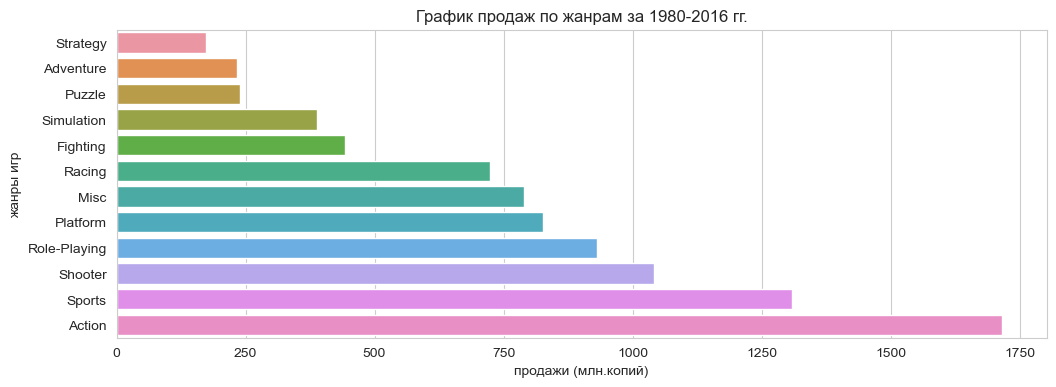

In [132]:
plt.figure(figsize=(12,4))
gs = df.pivot_table(index='genre', values='total', aggfunc='sum')\
.sort_values(by='total', ascending=True).reset_index().rename_axis(None, axis=1)
sns.barplot(data=gs, x='total', y='genre')
plt.title('График продаж по жанрам за 1980-2016 гг.')
plt.xlabel('продажи (млн.копий)')
plt.ylabel('жанры игр')
plt.show();

**Построим график распределения долей жанров по объему продаж:**

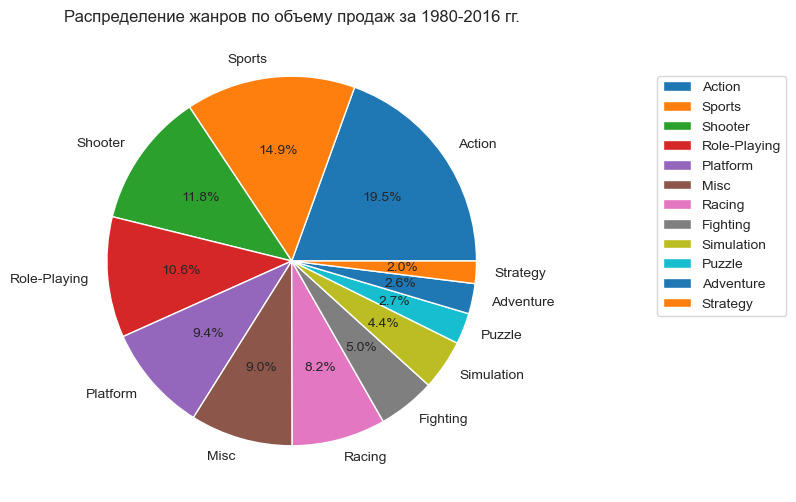

In [133]:
genre_sum.plot.pie(x='genre', y='total', autopct='%1.1f%%', figsize=(12,6), title='Распределение жанров по объему продаж за 1980-2016 гг.')
ax = plt.gca(); ax.axes.yaxis.set_visible(False)
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 0.93), borderaxespad= 0.97)
plt.show()

**Для сравнения построим график распределения долей жанров по количеству игр:**

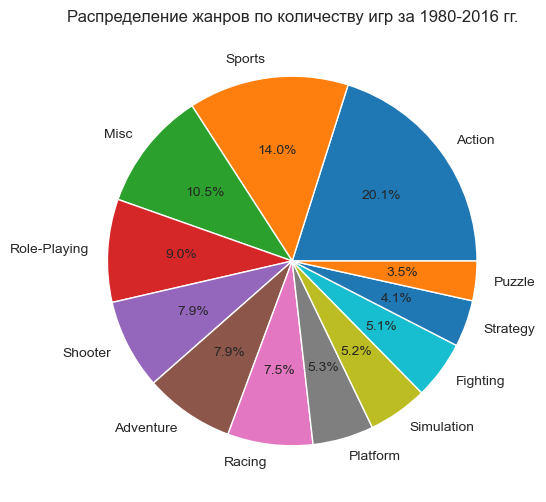

In [134]:
df['genre'].value_counts()\
.plot.pie(autopct='%1.1f%%', figsize=(12,6), title='Распределение жанров по количеству игр за 1980-2016 гг.')
ax = plt.gca(); ax.axes.yaxis.set_visible(False)
plt.show()

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

* Видна большая корреляция между продажами и количеством игр. Доля игр близка к доле продаж.<br>
* Жанры `Action`, `Sports`, `Shooter` - пользователи покупают чаще.<br>
* Жанры `Strategy`, `Adventure`, `Puzzle` - менее популярны<br>
* Жанр `Adventure` имеет особенность: доля игр этого жанра (7.9%) пользуется меньшим спросом (2.6%), почти в 3 раза.
</div>

#### По "медианным" продажам за "актуальный период"

Построим таблицу по жанрам и их продажам (млн.копий) за все периоды:

In [135]:
genre_sum = df[df['year'] >= 2013].pivot_table(index='genre', values='total', aggfunc='median')\
.sort_values(by='total', ascending=False).reset_index()
genre_sum

,genre,total
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


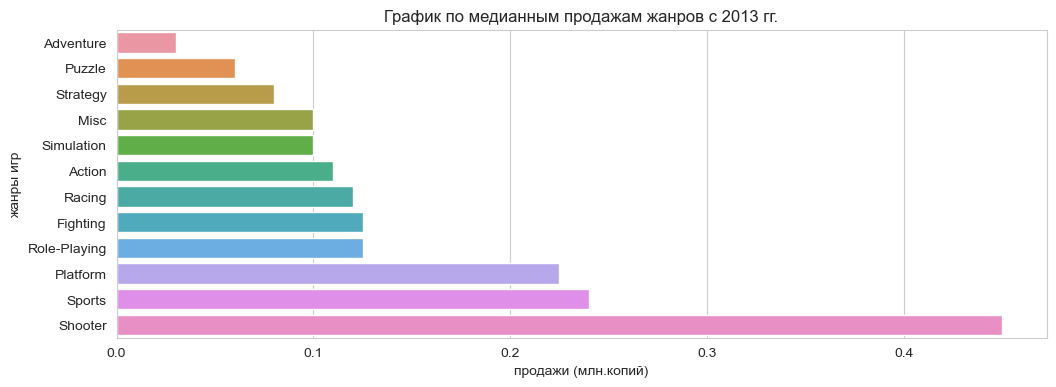

In [136]:
plt.figure(figsize=(12,4))
gs = df[df['year'] >= 2013].pivot_table(index='genre', values='total', aggfunc='median')\
.sort_values(by='total', ascending=True).reset_index().rename_axis(None, axis=1)
sns.barplot(data=gs, x='total', y='genre')
plt.title('График по медианным продажам жанров c 2013 гг.')
plt.xlabel('продажи (млн.копий)')
plt.ylabel('жанры игр')
plt.show();

**Построим график распределения долей жанров по объему продаж:**

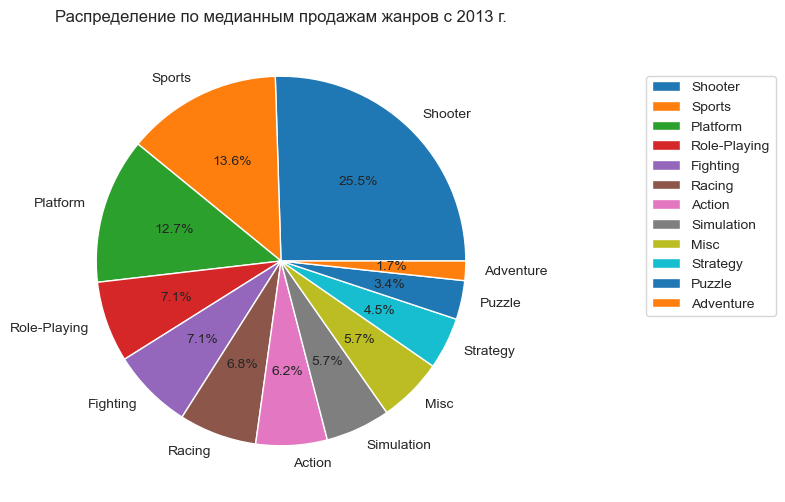

In [137]:
df[df['year'] >= 2013].pivot_table(index='genre', values='total', aggfunc='median')\
.sort_values(by='total', ascending=False).plot.pie(x='genre', y='total', autopct='%1.1f%%', figsize=(12,6), title='Распределение по медианным продажам жанров с 2013 г.')
ax = plt.gca(); ax.axes.yaxis.set_visible(False)
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 0.93), borderaxespad= 0.97)
plt.show()

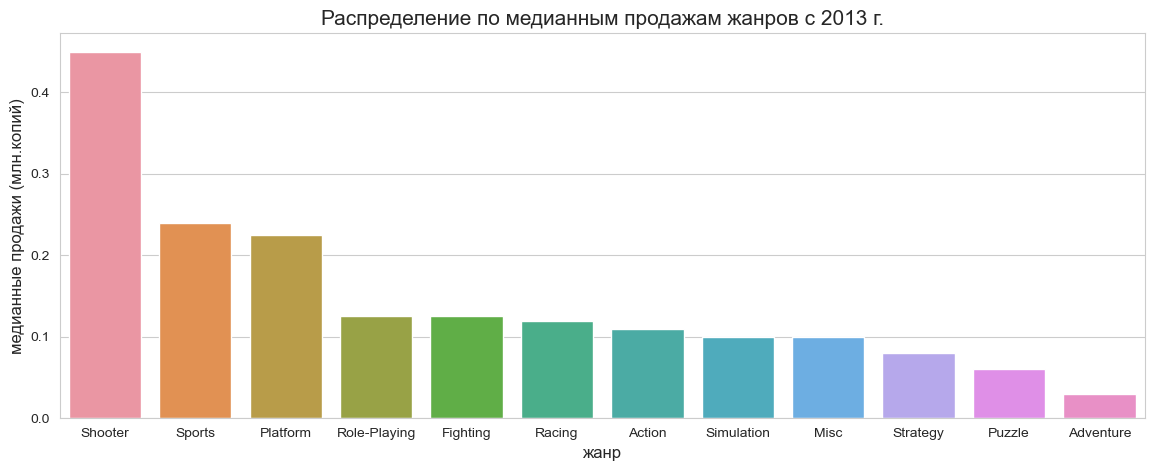

In [138]:
sns.set_style('whitegrid')
plt.figure(figsize=(14, 5))
sns.barplot(data=genre_sum, x='genre', y='total');
plt.title('Распределение по медианным продажам жанров с 2013 г.', fontsize=15)
plt.xlabel('жанр', fontsize=12)
plt.ylabel('медианные продажи (млн.копий)', fontsize=12);

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

* Жанр `Shooter` (для медианных продаж, с 2013 г.) занимает четверть всех продаж во всем мире<br>
* Жанр `Action` выпал из пятерки популярных жанров<br>
* Жанры `Shooter`, `Sports`, `Platform` - с 2013 г. пользователи покупают чаще.<br>
* Жанры `Strategy`, `Adventure`, `Puzzle` - менее популярны<br>
</div>

**Посмотрим данные продаж по жанрам, но уже с разбивкой по годам, начиная с 1993 г.:**<br>
(до 1993 г. существуют пропуски по жанрам и значения, близкие к нулю)

In [139]:
df_genre = df[df['year'] >= 1993].pivot_table(index='year', columns='genre', values='total', aggfunc='sum')\
.reset_index().rename_axis(None, axis=1)
df_genre

,year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1993,1.81,0.07,8.75,0.30,18.68,3.17,0.36,5.59,3.08,0.19,3.18,0.81
1,1994,1.55,3.74,8.48,2.86,28.76,1.53,2.18,7.13,8.30,2.72,8.41,3.57
2,1995,3.58,0.71,14.84,6.40,16.69,2.69,6.09,14.27,4.15,4.17,7.99,6.54
3,1996,20.60,4.18,18.04,10.66,28.23,3.92,28.27,43.99,6.90,11.33,17.42,5.61
4,1997,27.59,4.97,11.80,5.68,21.86,5.87,31.92,21.82,22.16,9.64,30.04,7.72
5,1998,39.41,9.04,31.68,11.90,29.83,6.35,27.88,28.08,9.80,7.11,41.75,13.48
6,1999,27.73,7.61,14.31,20.68,20.80,1.34,37.19,49.09,12.23,11.46,30.21,18.46
7,2000,33.98,2.96,20.26,15.55,16.05,3.83,20.00,29.05,6.83,3.37,41.24,8.54
8,2001,59.38,9.14,18.10,16.39,39.33,7.94,55.83,22.02,24.81,19.54,51.46,7.52
9,2002,86.65,11.09,24.92,15.63,45.95,5.33,30.15,45.13,48.47,10.82,65.31,5.52


**На основе этого датафрейма построим диаграмму с накоплением:**

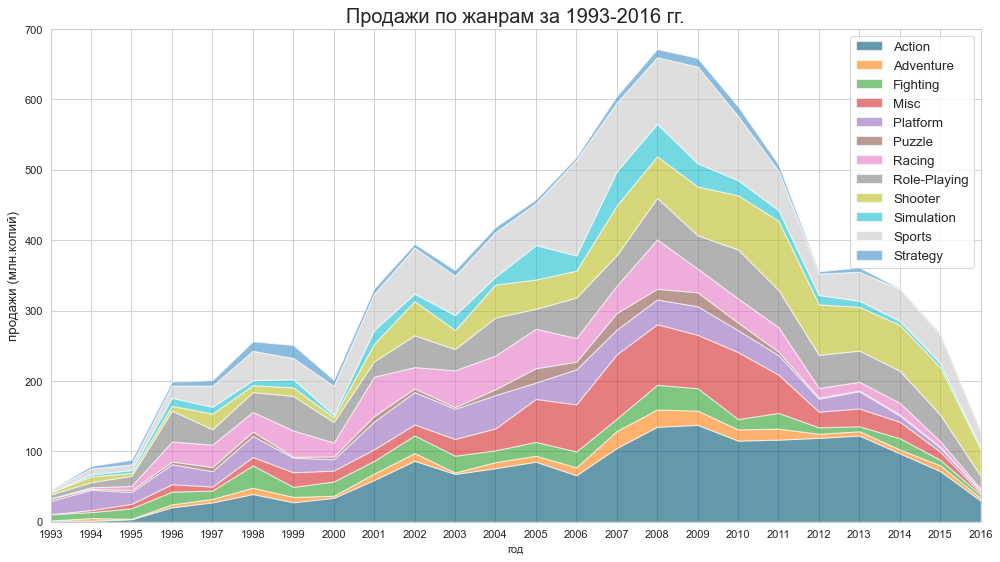

In [140]:
mycolors=['#005376','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#c8c8c8', '#3e90c9']
fig, ax = plt.subplots(1,1,figsize=(15,8), dpi= 80)
columns = df_genre.columns[1:]
labs = columns.values.tolist()

# Prepare data
x  = df_genre['year'].values.tolist() # year
y0 = df_genre[columns[0]].values.tolist() # Action
y1 = df_genre[columns[1]].values.tolist() # Adventure
y2 = df_genre[columns[2]].values.tolist() # Fighting
y3 = df_genre[columns[3]].values.tolist() # Misc
y4 = df_genre[columns[4]].values.tolist() # Platform
y5 = df_genre[columns[5]].values.tolist() # Puzzle
y6 = df_genre[columns[6]].values.tolist() # Racing
y7 = df_genre[columns[7]].values.tolist() # Role-Playing
y8 = df_genre[columns[8]].values.tolist() # Shooter
y9 = df_genre[columns[9]].values.tolist() # Simulation
y10=df_genre[columns[10]].values.tolist() # Sports
y11=df_genre[columns[11]].values.tolist() # Strategy
y = np.vstack([y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11])

# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.6)

# Decorations
ax.set_title('Продажи по жанрам за 1993-2016 гг.', fontsize=18)
ax.set(ylim=[0, 700])
ax.legend(fontsize=12)
plt.xticks(x[::1], fontsize=10)
plt.xlim(x[0], x[-1])
plt.xlabel('год')
plt.ylabel('продажи (млн.копий)', fontsize=12)
plt.show()

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

* На графике "Продажи по жанрам" хорошо видны периоды с высокими и низкими продажами.<br>
* На всем графике пропорции (доли) в продажах жанров практически не меняются.<br>
* Жанры `Action`, `Sports`, `Shooter` - покупают чаще.<br>
* Жанры `Strategy`, `Adventure`, `Puzzle` - менее популярны<br>
</div>

## 4️⃣ Портрет пользователя игр
Северной Америки, Европы, Японии (NA, EU, JP)

### Самые популярные платформы (ТОП-5)

#### Колличество продаж для Северной Америки `na`с 2014 г.:

In [141]:
na_sales_top5 = df[df['year'] > 2013].pivot_table(index='platform', values='na', aggfunc='sum')\
.sort_values(by='na', ascending=False).reset_index().rename_axis(None, axis=1).head()
na_sales_top5 = na_sales_top5.merge(df_pl, on='platform', how='left')
na_sales_top5 = na_sales_top5.rename(columns={'na':'na_sales'})
na_sales_top5

,platform,na_sales,pl_name,country,company
0,PS4,98.61,PlayStation 4,Япония,Sony
1,XOne,81.27,Xbox One,США,Microsoft
2,X360,28.30,Xbox 360,США,Microsoft
3,3DS,22.64,Nintendo 3DS,Япония,Nintendo
4,PS3,22.05,PlayStation 3,Япония,Sony


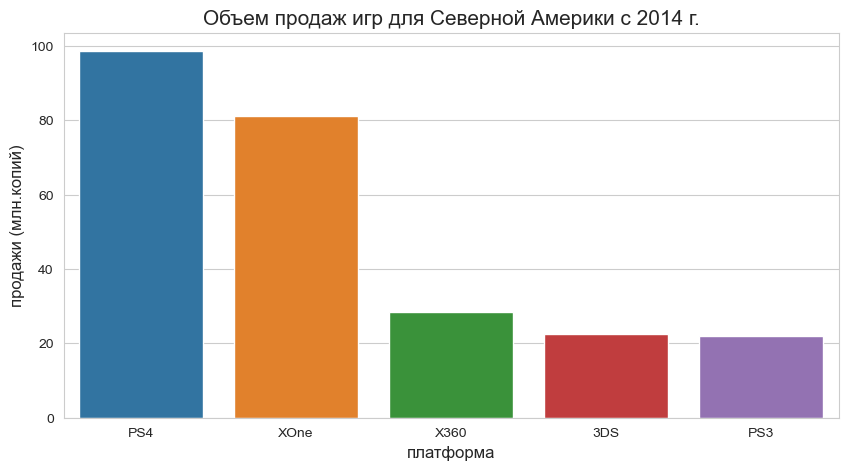

In [142]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.barplot(data = na_sales_top5, x='platform', y='na_sales');
plt.title('Объем продаж игр для Северной Америки с 2014 г.', fontsize=15)
plt.xlabel('платформа', fontsize=12)
plt.ylabel('продажи (млн.копий)', fontsize=12);

#### Колличество продаж для Европы `eu` с 2014 г.:

In [143]:
eu_sales_top5 = df[df['year'] > 2013].pivot_table(index='platform', values='eu', aggfunc='sum')\
.sort_values(by='eu', ascending=False).reset_index().rename_axis(None, axis=1).head()
eu_sales_top5 = eu_sales_top5.merge(df_pl, on='platform', how='left')
eu_sales_top5 = eu_sales_top5.rename(columns={'eu':'eu_sales'})
eu_sales_top5

,platform,eu_sales,pl_name,country,company
0,PS4,130.04,PlayStation 4,Япония,Sony
1,XOne,46.25,Xbox One,США,Microsoft
2,PS3,25.54,PlayStation 3,Япония,Sony
3,PC,17.97,Personal Computer,None,None
4,3DS,16.12,Nintendo 3DS,Япония,Nintendo


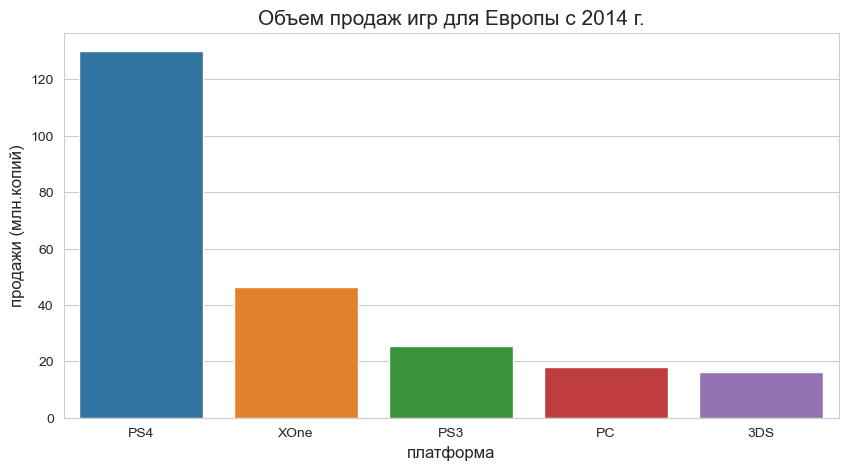

In [144]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.barplot(data = eu_sales_top5, x='platform', y='eu_sales');
plt.title('Объем продаж игр для Европы с 2014 г.', fontsize=15)
plt.xlabel('платформа', fontsize=12)
plt.ylabel('продажи (млн.копий)', fontsize=12);

#### Колличество продаж для Японии `jp` с 2014 г.:

In [145]:
jp_sales_top5 = df[df['year'] > 2013].pivot_table(index='platform', values='jp', aggfunc='sum')\
.sort_values(by='jp', ascending=False).head().reset_index().rename_axis(None, axis=1).head()
jp_sales_top5 = jp_sales_top5.merge(df_pl, on='platform', how='left')
jp_sales_top5 = jp_sales_top5.rename(columns={'jp':'jp_sales'})
jp_sales_top5

,platform,jp_sales,pl_name,country,company
0,3DS,44.24,Nintendo 3DS,Япония,Nintendo
1,PS4,15.02,PlayStation 4,Япония,Sony
2,PSV,14.54,PSVita,Япония,Sony
3,PS3,11.22,PlayStation 3,Япония,Sony
4,WiiU,7.31,Nintendo WiiU,Япония,Nintendo


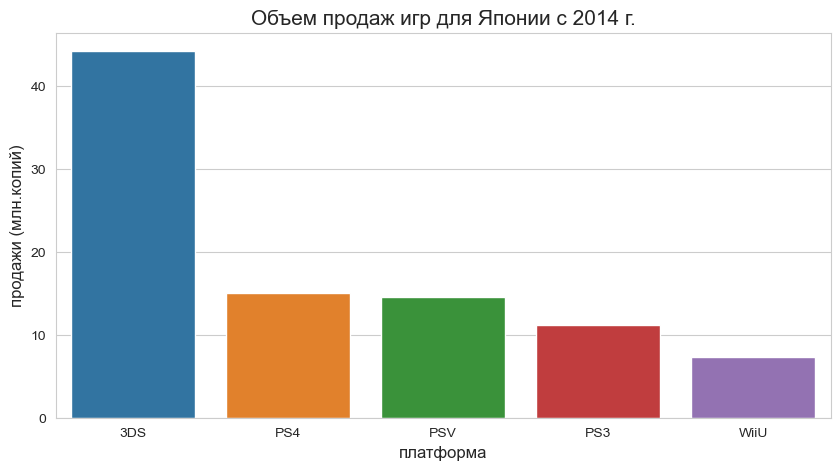

In [146]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.barplot(data = jp_sales_top5, x='platform', y='jp_sales');
plt.title('Объем продаж игр для Японии с 2014 г.', fontsize=15)
plt.xlabel('платформа', fontsize=12)
plt.ylabel('продажи (млн.копий)', fontsize=12);

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод за весь период:</b><br>

* В Северной Америке на пользователей игр сильно влияниет компания Microsoft (консоль X360). Похоже у них лучшая маркетинговая кампания. На втором месте их конкурент: Sony PlayStation 2- самая популярная платформа по миру.<br>
* В Европе на первых местах PS2, PS3 и потом X360. Объем продаж меньше, чем в Сев.Америке в 2 раза (хотя жителей в Европе наоборот в 2 больше). Это может говорить о том, консольные игры в Европе менее популярны, хуже работает реклама игр и что средний уровень жизни европейца меньше.<br>
* В Японии объем продаж еще меньше (в 2 раза, чем у Европы). Число жителей в 2 раза меньше, чем в Сев.Америке. Но т.к. они пионеры в создании консольных игр, видно влияние ранних версий платформ, влияние японской компании Nintendo на их рынок. К тому же Япония хуже пережила 2 финансовых кризиса 1998 и 2008 годов, что повлияло и на спрос в игровой индустрии, т.к. нет больших продаж X360
    
<b><font color='red'>Основной вывод с 2014 г:</font></b><br>
* В Северной Америке популярны `PS4` и `XOne`<br>
* В Европе популярна `PS4`<br>
* В Японии популярна `3DS`
</div>

### Самые популярные жанры (ТОП-5) с 2014 г.

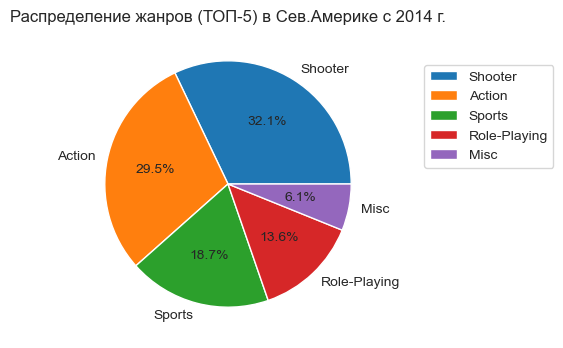

In [147]:
df[df['year'] > 2013].pivot_table(index='genre', values='na', aggfunc='sum').sort_values(by='na', ascending=False).head()\
.plot.pie(x='genre', y='na', autopct='%1.1f%%', figsize=(10,4), title='Распределение жанров (ТОП-5) в Сев.Америке с 2014 г.')
ax = plt.gca(); ax.axes.yaxis.set_visible(False)
plt.legend(loc='upper right', bbox_to_anchor=(1.6 , 0.93), borderaxespad= 0.97)
plt.show()

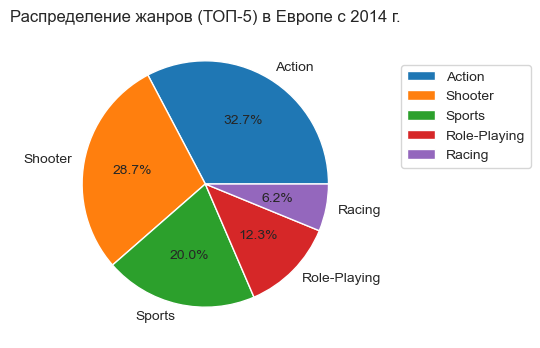

In [148]:
df[df['year'] > 2013].pivot_table(index='genre', values='eu', aggfunc='sum').sort_values(by='eu', ascending=False).head()\
.plot.pie(x='genre', y='eu', autopct='%1.1f%%', figsize=(10,4), title='Распределение жанров (ТОП-5) в Европе с 2014 г.')
ax = plt.gca(); ax.axes.yaxis.set_visible(False)
plt.legend(loc='upper right', bbox_to_anchor=(1.6 , 0.93), borderaxespad= 0.97)
plt.show()

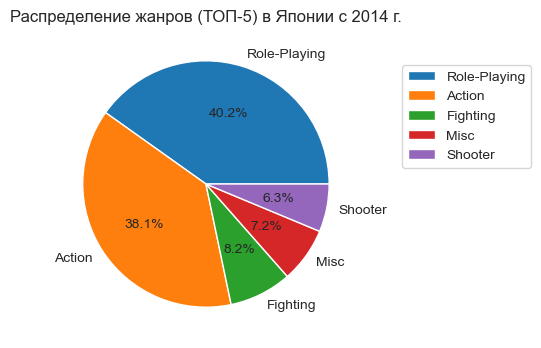

In [149]:
df[df['year'] > 2013].pivot_table(index='genre', values='jp', aggfunc='sum').sort_values(by='jp', ascending=False).head()\
.plot.pie(x='genre', y='jp', autopct='%1.1f%%', figsize=(10,4), title='Распределение жанров (ТОП-5) в Японии с 2014 г.')
ax = plt.gca(); ax.axes.yaxis.set_visible(False)
plt.legend(loc='upper right', bbox_to_anchor=(1.6 , 0.93), borderaxespad= 0.97)
plt.show()

In [150]:
df_genre_all = df[df['year'] > 2013].pivot_table(index='genre', values=['na', 'eu', 'jp'], aggfunc='sum')\
.sort_values(by='na', ascending=False).reset_index().rename_axis(None, axis=1)
df_genre_all

,genre,eu,jp,na
0,Shooter,65.52,4.87,79.02
1,Action,74.68,29.58,72.53
2,Sports,45.73,3.26,46.13
3,Role-Playing,28.17,31.16,33.47
4,Misc,12.86,5.61,15.05
5,Fighting,6.69,6.37,12.43
6,Racing,14.13,1.76,8.74
7,Platform,6.80,2.69,6.79
8,Adventure,6.49,3.60,5.64
9,Simulation,7.30,2.31,2.63


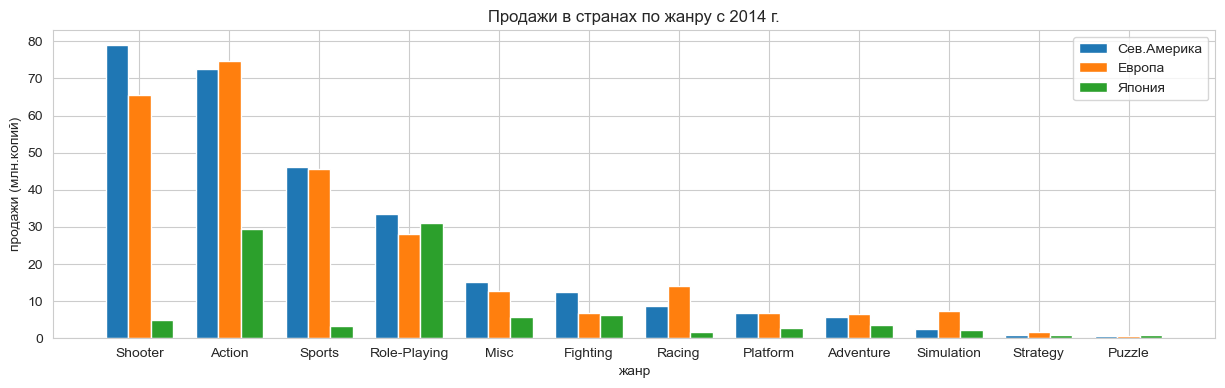

In [151]:
plt.figure(figsize=(15,4))
x = df_genre_all['genre']
gna = df_genre_all['na']
geu = df_genre_all['eu']
gjp = df_genre_all['jp']
x_axis = np.arange(len(x)) 
plt.bar(x_axis - 0.25, gna, 0.25, label = 'Сев.Америка') 
plt.bar(x_axis + 0, geu, 0.25, label = 'Европа') 
plt.bar(x_axis + 0.25, gjp, 0.25, label = 'Япония') 
plt.xticks(x_axis, x) 
plt.xlabel("жанр") 
plt.ylabel("продажи (млн.копий)") 
plt.title("Продажи в странах по жанру с 2014 г.") 
plt.legend() 
plt.show() 

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

* В Северной Америке и Европе схожая тройка популярных жанров: `Shooter`, `Action`, `Sports`<br>
* В Японии на первом месте стоит жанр `Role-Playing` (RPG)<br>
* В современных играх разделение на жанры- условное. Т.к. игры стали более сложными и могут сочетать в себе несколько жанров.
</div>

### Влияние рейтинга ESRB на продажи

- **EC**	- Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.
- **E**	- Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
- **E10+**	- Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
- **T**	- Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
- **M**	- Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.
- **AO**	- Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.
- **RP**	- Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

#### За весь период

**Построим таблицу рейтинга `ESRB` по странам и их внутренним продажам:**

In [152]:
df_rating = df.pivot_table(index='rating', values=['na', 'eu', 'jp'], aggfunc='sum')\
.sort_values(by='na', ascending=False).reset_index().rename_axis(None, axis=1)
df_rating

,rating,eu,jp,na
0,E,704.14,199.42,1276.80
1,Unknown,609.65,836.72,1225.84
2,T,421.79,150.70,747.60
3,M,480.00,63.58,742.89
4,E10+,183.83,40.20,345.50
5,EC,0.11,0.00,1.53
6,AO,0.61,0.00,1.26
7,RP,0.03,0.00,0.00


**Построим график рейтинга по странам:**

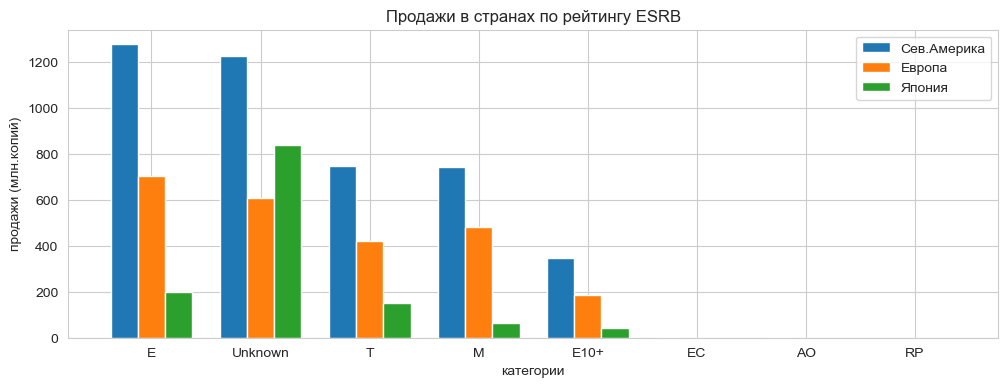

In [153]:
plt.figure(figsize=(12,4))
x = df_rating['rating']
rna = df_rating['na']
reu = df_rating['eu']
rjp = df_rating['jp']
x_axis = np.arange(len(x)) 
plt.bar(x_axis - 0.25, rna, 0.25, label = 'Сев.Америка') 
plt.bar(x_axis + 0, reu, 0.25, label = 'Европа') 
plt.bar(x_axis + 0.25, rjp, 0.25, label = 'Япония') 
plt.xticks(x_axis, x) 
plt.xlabel("категории") 
plt.ylabel("продажи (млн.копий)") 
plt.title("Продажи в странах по рейтингу ESRB") 
plt.legend() 
plt.show() 

**Почему у Японии так много значений `Unknown`? Посмотрим на первые записи в датафрейме:**

In [154]:
df.query('jp > 0 and rating != "Unknown"').sort_values('year').head()

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
1551,Battle Arena Toshinden,PS,1994,Fighting,0.39,0.26,0.53,0.08,69.0,6.3,T,1.26
892,PaRappa The Rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92.0,7.4,E,1.91
202,Resident Evil,PS,1996,Action,2.05,1.16,1.11,0.73,91.0,9.0,M,5.05
153,Tekken 2,PS,1996,Fighting,2.26,1.89,1.36,0.23,89.0,8.9,T,5.74
228,Tomb Raider,PS,1996,Action,2.29,1.97,0.13,0.24,91.0,8.6,T,4.63


#### За период (с 2011 г.)

**Построим таблицу рейтинга `ESRB` по странам и их внутренним продажам с 2011 г.:**

In [155]:
df_rating_2011 = df[df['year'] >= 2011].pivot_table(index='rating', values=['na', 'eu', 'jp'], aggfunc='sum')\
.sort_values(by='na', ascending=False).reset_index().rename_axis(None, axis=1)
df_rating_2011

,rating,eu,jp,na
0,M,250.26,26.14,308.45
1,E,141.73,36.68,170.17
2,Unknown,116.61,138.21,123.69
3,E10+,78.00,11.23,117.72
4,T,83.16,33.39,109.31
5,EC,0.00,0.00,0.42
6,RP,0.03,0.00,0.00


**Построим график рейтинга по странам:**

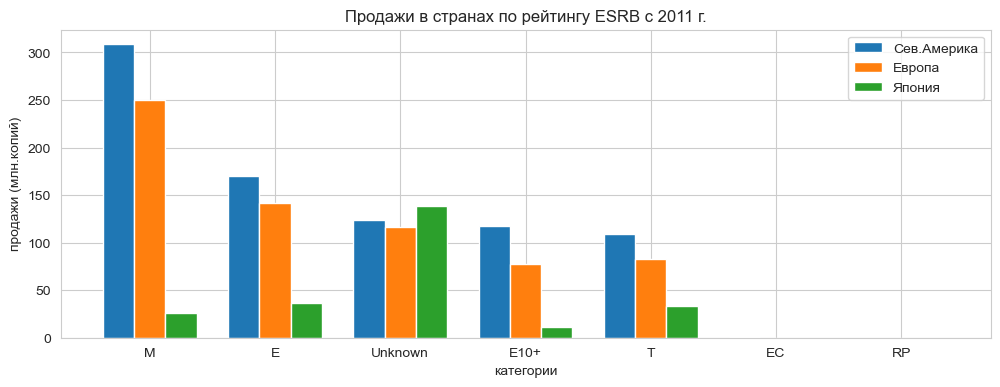

In [156]:
plt.figure(figsize=(12,4))
x = df_rating_2011['rating']
rna = df_rating_2011['na']
reu = df_rating_2011['eu']
rjp = df_rating_2011['jp']
x_axis = np.arange(len(x)) 
plt.bar(x_axis - 0.25, rna, 0.25, label = 'Сев.Америка') 
plt.bar(x_axis + 0, reu, 0.25, label = 'Европа') 
plt.bar(x_axis + 0.25, rjp, 0.25, label = 'Япония') 
plt.xticks(x_axis, x) 
plt.xlabel("категории") 
plt.ylabel("продажи (млн.копий)") 
plt.title("Продажи в странах по рейтингу ESRB с 2011 г.") 
plt.legend() 
plt.show() 

#### За период (с 2014 г.)

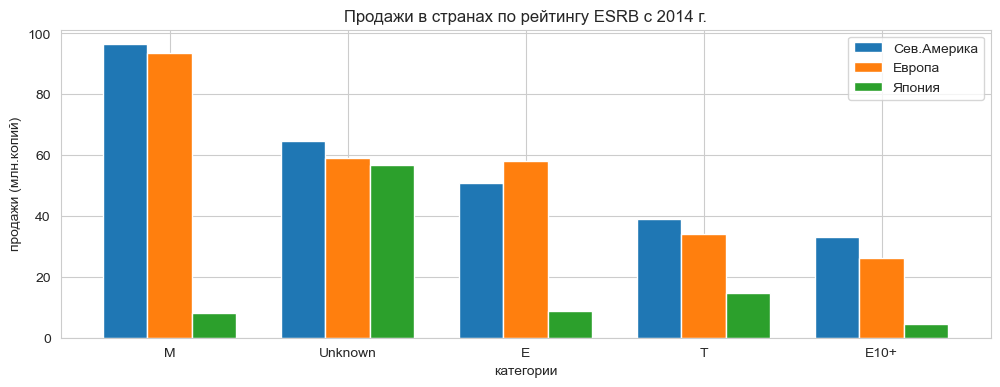

In [157]:
df_rating_2014 = df[df['year'] >= 2014].pivot_table(index='rating', values=['na', 'eu', 'jp'], aggfunc='sum')\
.sort_values(by='na', ascending=False).reset_index().rename_axis(None, axis=1)
plt.figure(figsize=(12,4))
x = df_rating_2014['rating']
rna = df_rating_2014['na']
reu = df_rating_2014['eu']
rjp = df_rating_2014['jp']
x_axis = np.arange(len(x)) 
plt.bar(x_axis - 0.25, rna, 0.25, label = 'Сев.Америка') 
plt.bar(x_axis + 0, reu, 0.25, label = 'Европа') 
plt.bar(x_axis + 0.25, rjp, 0.25, label = 'Япония') 
plt.xticks(x_axis, x) 
plt.xlabel("категории") 
plt.ylabel("продажи (млн.копий)") 
plt.title("Продажи в странах по рейтингу ESRB с 2014 г.") 
plt.legend() 
plt.show() 

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Вывод:</b><br>

<b>За весь период:</b><br>
* Видим,что больше всего продаж дя рейтинга E (для всех возрастных категорий)<br>
* Рейтинги T, M и E10+ идут следом.<br>
* Консольных игр для малышей и игр "только для взрослых" на общем фоне не видно<br>
* Большой массив данных для игр без возрастного рейтинга `Unknown`. Рейтинг стали применять не сразу<br>
* В Японии много игр без рейтинга. Полагаю, что система "американского рейтинга ESRB" стала применяться в Японии только с 1994-1996 гг. Поэтому огромное количество игр, созданных и проданных в Японии ранее не имеют рейтинга<br>
* Доли продаж по странам примерно одинаковые. Каких-то особенностей не видно

<b>За период с 2011г:</b><br>
* Видим, что больше всего продаж у рейтинга М (старше 17 лет)<br>
* Рейтинги E, E10+ и T идут следом.<br>
    
<b>За период с 2014г:</b><br>
* Видим, что больше всего продаж у рейтинга М (старше 17 лет)<br>
* Рейтинги E, T и E10+ идут следом.<br>
</div>

## 5️⃣ Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### За весь период данных

Данные платформ разбросаны по времени. Посмотрим данные

In [158]:
df.query('platform == "XOne" and user_score != 0').sort_values(by='year').head(3) # XOne

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
1938,LEGO Marvel Super Heroes,XOne,2013,Action,0.61,0.35,0.00,0.09,0.0,6.8,E10+,1.05
5607,Skylanders SWAP Force,XOne,2013,Platform,0.22,0.06,0.00,0.03,0.0,5.5,E10+,0.31
1163,Dead Rising 3,XOne,2013,Action,1.06,0.35,0.01,0.15,78.0,6.8,M,1.57


In [159]:
df.query('platform == "PC" and user_score != 0').sort_values(by='year').head() # PC

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
14241,Alter Ego,PC,1985,Simulation,0.00,0.03,0.0,0.01,59.0,5.8,T,0.04
14390,SimCity,PC,1988,Simulation,0.00,0.02,0.0,0.01,64.0,2.2,E10+,0.03
14379,Doom,PC,1992,Shooter,0.02,0.00,0.0,0.00,85.0,8.2,M,0.02
1147,Diablo,PC,1996,Role-Playing,0.01,1.58,0.0,0.00,94.0,8.7,M,1.59
1991,Tomb Raider,PC,1996,Action,0.96,0.07,0.0,0.00,86.0,8.5,M,1.03


2013 - начало данных для XOne<br>
1985 - первые записи для PC

Определим выборки пользовательского рейтинга платформ Xbox One и PC, уберем нулевые значения рейтинга.

In [160]:
xone_user_score = df.query('platform == "XOne" and user_score != 0')['user_score']
pc_user_score = df.query('platform == "PC" and user_score != 0')['user_score']

Определим средние значения для XOne и PC:

In [161]:
xone_mean = xone_user_score.mean().round(2)
pc_mean = pc_user_score.mean().round(2)
print(f'{xone_mean} - среднее для XOne', f'{pc_mean} - среднее для PC', sep='\n')

6.52 - среднее для XOne
7.07 - среднее для PC


Определим дисперсии для XOne и PC:

In [162]:
xone_var = xone_user_score.var()
pc_var = pc_user_score.var()
print(f'{round(xone_var, 2)} - дисперсия для XOne', f'{round(pc_var, 2)} - дисперсия для PC', sep='\n')
print(f'{round(pc_var/xone_var, 2)} - соотношение дисперсий')

1.91 - дисперсия для XOne
2.35 - дисперсия для PC
1.23 - соотношение дисперсий


Дисперсии генеральной совокупности идентичны по отклонению (меньше 4)

Посмотрим описательную статистику рейтинга для платформ XOne и PC:

In [163]:
xone_user_score.describe().round(2) # XOne

count    182.00
mean       6.52
std        1.38
min        1.60
25%        5.80
50%        6.80
75%        7.50
max        9.20
Name: user_score, dtype: float64

In [164]:
pc_user_score.describe().round(2) # PC

count    755.00
mean       7.07
std        1.53
min        1.40
25%        6.20
50%        7.50
75%        8.20
max        9.30
Name: user_score, dtype: float64

182 - выборка значений XOne<br>
755 - выборка значений PC

Отобразим гистограммы:

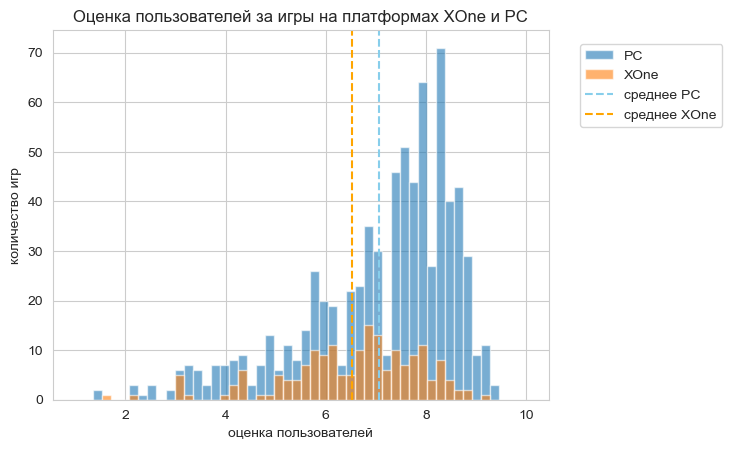

In [165]:
#plt.figure(figsize=(10,4))
plt.hist(pc_user_score, range=(1,10), bins=50, alpha=0.6, label='PC')
plt.hist(xone_user_score, range=(1,10), bins=50, alpha=0.6, label='XOne')
plt.axvline (x=pc_mean, color='skyblue', linestyle='--', label='среднее PC')
plt.axvline (x=xone_mean, color='orange', linestyle='--', label='среднее XOne')

plt.title('Оценка пользователей за игры на платформах XOne и PC')
plt.xlabel('оценка пользователей')
plt.ylabel('количество игр')
plt.legend(loc='center right', bbox_to_anchor=(1.35,0.85), borderaxespad=0)
plt.show()

<b>Сформулируем двухвыборочную статистическую гипотезу для независимых выборок:</b><br>
* Гипотеза Н0: средние пользовательские рейтинги XOne и PC равны<br>
* Гипотеза Н1: средние пользовательские рейтинги XOne и PC не равны<br>
* Уровень значимости: 5%

Обе группы данных взяты из совокупностей, которые следуют нормальному распределению, при этом дисперсии генеральной совокупности идентичны по отклонению (разница в 1.23 раз). Поэтому применим Т-критерий Стьюдента (equal_var=True). Двустороння гипотеза (alternative='two-sided'). Размеры выборок разных размеров (182 = XOne, 755 = PC), NaN будут опущены при выполнении вычисления (nan_policy='omit'):

In [166]:
t_statistic, p_value = st.ttest_ind(xone_user_score.dropna(), pc_user_score.dropna(), \
                                    equal_var=True, alternative='two-sided', nan_policy='omit')
print("t-статистика:", t_statistic)
print("p-значение:", p_value)
if p_value < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

t-статистика: -4.38289526334195
p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


Поскольку p-значение меньше уровня значимости (0.05), мы отвергаем нулевую гипотезу T-критерия и делаем вывод, что средние пользовательские рейтинги XOne и PC не равны.

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Промежуточный вывод:</b><br>

<b>Гипотеза не подтвердилась.</b><br>
Для всего периода данных средние пользовательские рейтинги XOne и PC не равны
</div>

#### С 2013 года (одинаковый период данных для платформ)

Определим выборки пользовательского рейтинга платформ Xbox One и PC с 2013 г., уберем нулевые значения рейтинга.

In [167]:
xone_2013 = df[df['year'] > 2012].query('platform == "XOne" and user_score != 0')['user_score']
pc_2013 = df[df['year'] > 2012].query('platform == "PC" and user_score != 0')['user_score']

Определим средние значения для XOne и PC:

In [168]:
xone_mean_2013 = xone_user_score.mean().round(2)
pc_mean_2013 = pc_user_score.mean().round(2)
print(f'{xone_mean_2013} - среднее для XOne', f'{pc_mean_2013} - среднее для PC', sep='\n')

6.52 - среднее для XOne
7.07 - среднее для PC


Определим дисперсии для XOne и PC:

In [169]:
xone_var_2013 = xone_2013.var()
pc_var_2013 = pc_2013.var()
print(f'{round(xone_var_2013, 2)} - дисперсия для XOne', f'{round(pc_var_2013, 2)} - дисперсия для PC', sep='\n')
print(f'{round(pc_var_2013/xone_var_2013, 2)} - соотношение дисперсий')

1.91 - дисперсия для XOne
3.04 - дисперсия для PC
1.59 - соотношение дисперсий


Дисперсии генеральной совокупности идентичны по отклонению (меньше 4)

Посмотрим описательную статистику рейтинга для платформ XOne и PC:

In [170]:
xone_2013.describe().round(2) # XOne

count    182.00
mean       6.52
std        1.38
min        1.60
25%        5.80
50%        6.80
75%        7.50
max        9.20
Name: user_score, dtype: float64

In [171]:
pc_2013.describe().round(2) # PC

count    155.00
mean       6.27
std        1.74
min        1.40
25%        5.30
50%        6.80
75%        7.60
max        9.30
Name: user_score, dtype: float64

182 - выборка значений XOne<br>
155 - выборка значений PC

Отобразим гистограммы:

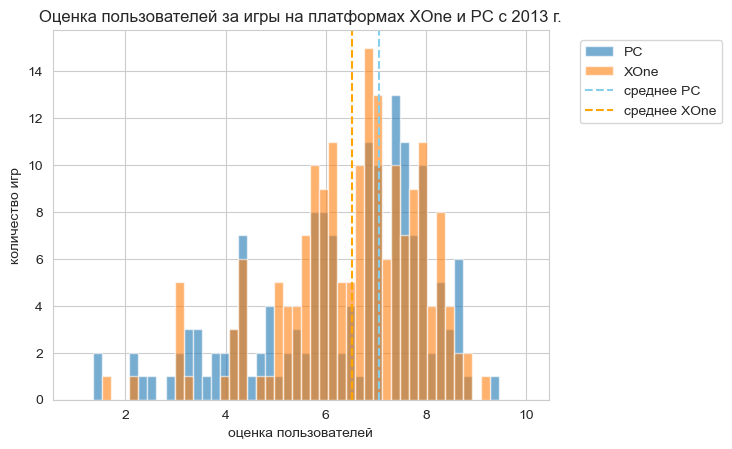

In [172]:
#plt.figure(figsize=(10,4))
plt.hist(pc_2013, range=(1,10), bins=50, alpha=0.6, label='PC')
plt.hist(xone_2013, range=(1,10), bins=50, alpha=0.6, label='XOne')
plt.axvline (x=pc_mean_2013, color='skyblue', linestyle='--', label='среднее PC')
plt.axvline (x=xone_mean_2013, color='orange', linestyle='--', label='среднее XOne')

plt.title('Оценка пользователей за игры на платформах XOne и PC с 2013 г.')
plt.xlabel('оценка пользователей')
plt.ylabel('количество игр')
plt.legend(loc='center right', bbox_to_anchor=(1.35,0.86), borderaxespad=0)
plt.show()

<b>Сформулируем двухвыборочную статистическую гипотезу для независимых выборок:</b><br>
* Гипотеза Н0: средние пользовательские рейтинги XOne и PC (2013 г) равны<br>
* Гипотеза Н1: средние пользовательские рейтинги XOne и PC (2013 г) не равны<br>
* Уровень значимости: 5%

Обе группы данных взяты из совокупностей, которые следуют нормальному распределению, при этом дисперсии генеральной совокупности идентичны по отклонению (разница в 1.59 раз). Поэтому применим Т-критерий Стьюдента (equal_var=True). Двустороння гипотеза (alternative='two-sided'). Размеры выборок разных размеров (182 = XOne, 155 = PC), NaN будут опущены при выполнении вычисления (nan_policy='omit'):

In [173]:
t_statistic, p_value = st.ttest_ind(xone_2013.dropna(), pc_2013.dropna(), \
                                    equal_var=True, alternative='two-sided', nan_policy='omit')
print("t-статистика:", t_statistic)
print("p-значение:", p_value)
if p_value < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

t-статистика: 1.4788255981357277
p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Поскольку p-значение больше уровня значимости (0.05), мы подтверждаем нулевую гипотезу T-критерия и делаем вывод, что средние пользовательские рейтинги XOne и PC (с 2013 г.) равны.

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Промежуточный вывод:</b><br>

<b>Гипотеза подтвердилась.</b><br>
Для периода данных с 2013 г. средние пользовательские рейтинги XOne и PC равны
</div>

<b>Вывод</b> 🔉<br><br>
<div style="border:solid SteelBlue 3px; padding: 20px; border-radius: 10px">


* <b>За весь период данных</b> гипотеза о равенстве средних рейтингов платформ Xone и PC - <b>не подтвердилась</b><br>
* <b>С 2013 года</b>, когда появились первые записи XOne и взяли данные для PC, гипотеза о равенстве средних рейтингов платформ Xone и PC - <b>подтвердилась</b><br>

* В наших иссследуемых "платформах" PC отличается тем, что это не консоль. Это аномалия среди консолей- по периодами, по спросу, по наполенности значениями данного датафрейма<br>
* PC в датафрейме рассматривается с 1994 года. И начиная с этого периода никаких "качественных" изменений не было. Нет квантового перехода. Поэтому рассматривать данные для PC только с 2013 года считаю не обоснованным методом<br>
</div>

### Средние пользовательские рейтинги жанров Action и Sports разные

#### За весь период данных

Данные платформ разбросаны по времени. Посмотрим данные

In [174]:
df.query('genre == "Action" and user_score != 0').sort_values(by='year').head(3) # Action

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
228,Tomb Raider,PS,1996,Action,2.29,1.97,0.13,0.24,91.0,8.6,T,4.63
1991,Tomb Raider,PC,1996,Action,0.96,0.07,0.00,0.00,86.0,8.5,M,1.03
202,Resident Evil,PS,1996,Action,2.05,1.16,1.11,0.73,91.0,9.0,M,5.05


In [175]:
df.query('genre == "Sports" and user_score != 0').sort_values(by='year').head(3) # Sports

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total
2647,ISS Pro Evolution,PS,1998,Sports,0.00,0.00,0.71,0.05,94.0,8.7,E,0.76
204,Tony Hawk's Pro Skater,PS,1999,Sports,3.42,1.38,0.02,0.20,92.0,9.2,T,5.02
1089,SSX,PS2,2000,Sports,0.78,0.61,0.06,0.20,93.0,8.3,E,1.65


1996 - начало данных для жанра Action<br>
1998 - первые записи для жанра Sports

Определим выборки пользовательского рейтинга жанров Action и Sports, уберем нулевые значения рейтинга.

In [176]:
action_user_score = df.query('genre == "Action" and user_score != 0')['user_score']
sports_user_score = df.query('genre == "Sports" and user_score != 0')['user_score']

Определим средние значения для Action и Sports:

In [177]:
action_mean = action_user_score.mean().round(2)
sports_mean = sports_user_score.mean().round(2)
print(f'{action_mean} - среднее для Action', f'{sports_mean} - среднее для Sports', sep='\n')

7.06 - среднее для Action
6.95 - среднее для Sports


Определим дисперсии для Action и Sports:

In [178]:
action_var = action_user_score.var()
sports_var = sports_user_score.var()
print(f'{round(action_var, 2)} - дисперсия для Action', f'{round(sports_var, 2)} - дисперсия для Sports', sep='\n')
print(f'{round(sports_var/action_var, 2)} - соотношение дисперсий')

2.03 - дисперсия для Action
2.62 - дисперсия для Sports
1.29 - соотношение дисперсий


Дисперсии генеральной совокупности идентичны по отклонению (меньше 4)

Посмотрим описательную статистику рейтинга для платформ Action и Sports:

In [179]:
action_user_score.describe().round(2) # Action

count    1796.00
mean        7.06
std         1.42
min         0.30
25%         6.30
50%         7.40
75%         8.10
max         9.50
Name: user_score, dtype: float64

In [180]:
sports_user_score.describe().round(2) # Sports

count    1080.00
mean        6.95
std         1.62
min         0.20
25%         6.10
50%         7.40
75%         8.10
max         9.50
Name: user_score, dtype: float64

1796 - выборка значений Action<br>
1080 - выборка значений Sports

Отобразим гистограммы:

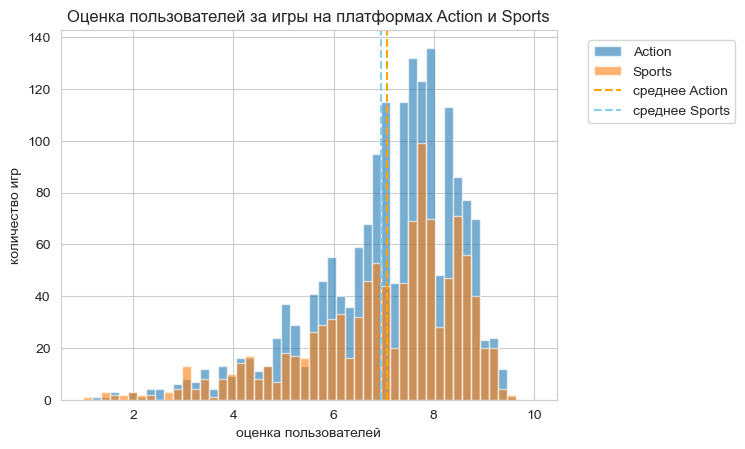

In [181]:
#plt.figure(figsize=(10,4))
plt.hist(action_user_score, range=(1,10), bins=50, alpha=0.6, label='Action')
plt.hist(sports_user_score, range=(1,10), bins=50, alpha=0.6, label='Sports')
plt.axvline (x=action_mean, color='orange', linestyle='--', label='среднее Action')
plt.axvline (x=sports_mean, color='skyblue', linestyle='--', label='среднее Sports')
plt.title('Оценка пользователей за игры на платформах Action и Sports')
plt.xlabel('оценка пользователей')
plt.ylabel('количество игр')
plt.legend(loc='center right', bbox_to_anchor=(1.36,0.86), borderaxespad=0)
plt.show()

<b>Сформулируем двухвыборочную статистическую гипотезу для независимых выборок:</b><br>
* Гипотеза Н0: средние пользовательские рейтинги Action и Sports равны<br>
* Гипотеза Н1: средние пользовательские рейтинги Action и Sports не равны<br>
* Уровень значимости: 5%

Обе группы данных взяты из совокупностей, которые следуют нормальному распределению, при этом дисперсии генеральной совокупности идентичны по отклонению (разница в 1.29 раз). Поэтому применим Т-критерий Стьюдента (equal_var=True). Двустороння гипотеза (alternative='two-sided'). Размеры выборок разных размеров (1796 = Action, 1080 = Sports), NaN будут опущены при выполнении вычисления (nan_policy='omit'):

In [182]:
t_statistic, p_value = st.ttest_ind(action_user_score.dropna(), sports_user_score.dropna(), \
                                    equal_var=True, alternative='two-sided', nan_policy='omit')
print("t-статистика:", t_statistic)
print("p-значение:", p_value)
if p_value < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

t-статистика: 1.823464655111042
p-значение: 0.06833686503882228
Не получилось отвергнуть нулевую гипотезу


Поскольку p-значение больше уровня значимости (0.05), мы не отвергаем нулевую гипотезу T-критерия и делаем вывод, что средние пользовательские рейтинги Action и Sports равны.

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Промежуточный вывод:</b><br>

<b>Выдвинутая гипотеза не подтвердилась.</b><br>
Для всего периода данных средние пользовательские рейтинги Action и Sports <b>равны</b>
</div>

#### С 2013 года (популярный период)

Используем данные жанров с популярного периода, с 2013 г.

Определим выборки пользовательского рейтинга жанров Action и Sports, уберем нулевые значения рейтинга.

In [183]:
action_user_score_2013 = df[df['year'] > 2012].query('genre == "Action" and user_score != 0')['user_score']
sports_user_score_2013 = df[df['year'] > 2012].query('genre == "Sports" and user_score != 0')['user_score']

Определим средние значения для Action и Sports, с 2013 г:

In [184]:
action_mean_2013 = action_user_score_2013.mean().round(2)
sports_mean_2013 = sports_user_score_2013.mean().round(2)
print(f'{action_mean_2013} - среднее для Action', f'{sports_mean_2013} - среднее для Sports', sep='\n')

6.84 - среднее для Action
5.24 - среднее для Sports


Определим дисперсии для Action и Sports с 2013 г.:

In [185]:
action_var_2013 = action_user_score_2013.var()
sports_var_2013 = sports_user_score_2013.var()
print(f'{round(action_var_2013, 2)} - дисперсия для Action', f'{round(sports_var_2013, 2)} - дисперсия для Sports', sep='\n')
print(f'{round(sports_var_2013/action_var_2013, 2)} - соотношение дисперсий')

1.77 - дисперсия для Action
3.18 - дисперсия для Sports
1.8 - соотношение дисперсий


Дисперсии генеральной совокупности идентичны по отклонению (меньше 4)

Посмотрим описательную статистику рейтинга для жанров Action и Sports с 2013 г.:

In [186]:
action_user_score_2013.describe().round(2) # Action

count    389.00
mean       6.84
std        1.33
min        2.00
25%        6.30
50%        7.10
75%        7.80
max        9.10
Name: user_score, dtype: float64

In [187]:
sports_user_score_2013.describe().round(2) # Sports

count    160.00
mean       5.24
std        1.78
min        0.20
25%        4.10
50%        5.50
75%        6.50
max        8.80
Name: user_score, dtype: float64

389 - выборка значений Action<br>
160 - выборка значений Sports

Отобразим гистограммы:

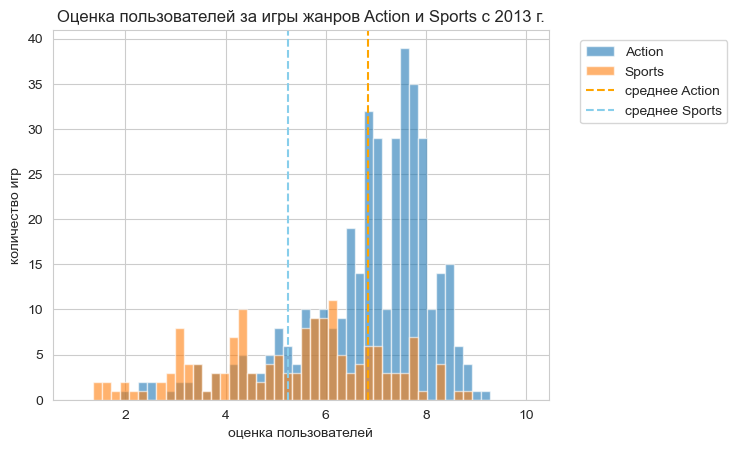

In [188]:
#plt.figure(figsize=(10,4))
plt.hist(action_user_score_2013, range=(1,10), bins=50, alpha=0.6, label='Action')
plt.hist(sports_user_score_2013, range=(1,10), bins=50, alpha=0.6, label='Sports')
plt.axvline (x=action_mean_2013, color='orange', linestyle='--', label='среднее Action')
plt.axvline (x=sports_mean_2013, color='skyblue', linestyle='--', label='среднее Sports')
plt.title('Оценка пользователей за игры жанров Action и Sports с 2013 г.')
plt.xlabel('оценка пользователей')
plt.ylabel('количество игр')
plt.legend(loc='center right', bbox_to_anchor=(1.36,0.86), borderaxespad=0)
plt.show()

<b>Сформулируем двухвыборочную статистическую гипотезу для независимых выборок:</b><br>
* Гипотеза Н0: средние пользовательские рейтинги Action и Sports равны<br>
* Гипотеза Н1: средние пользовательские рейтинги Action и Sports не равны<br>
* Уровень значимости: 5%

Обе группы данных взяты из совокупностей, которые следуют нормальному распределению, при этом дисперсии генеральной совокупности идентичны по отклонению (разница в 1.8 раз). Поэтому применим Т-критерий Стьюдента (equal_var=True). Двустороння гипотеза (alternative='two-sided'). Размеры выборок разных размеров (389 = Action, 160 = Sports), NaN будут опущены при выполнении вычисления (nan_policy='omit'):

In [189]:
t_statistic, p_value = st.ttest_ind(action_user_score_2013.dropna(), sports_user_score_2013.dropna(), \
                                    equal_var=True, alternative='two-sided', nan_policy='omit')
print("t-статистика:", t_statistic)
print("p-значение:", p_value)
if p_value < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

t-статистика: 11.535100577928208
p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Поскольку p-значение меньше уровня значимости (0.05), мы отвергаем нулевую гипотезу T-критерия и делаем вывод, что средние пользовательские рейтинги Action и Sports не равны.

<div style="border:solid SteelBlue 1px; padding: 20px; border-radius: 10px">
<b>Промежуточный вывод:</b><br>

<b>Выдвинутая гипотеза подтвердилась.</b><br>
Начиная с 2013 г. средние пользовательские рейтинги Action и Sports <b>не равны</b>
</div>

<b>Вывод</b> 🔉<br><br>
<div style="border:solid SteelBlue 3px; padding: 20px; border-radius: 10px">


* <b>За весь период данных</b> гипотеза о различии средних рейтингов жанров Action и Sports - <b>не подтвердилась</b> (для всего периода данных средние пользовательские рейтинги Action и Sports равны)<br>
* <b>С 2013 года</b> гипотеза о различии средних рейтингов жанров Action и Sports - <b> подтвердилась</b> (с 2013 г. средние пользовательские рейтинги Action и Sports не равны)<br>

    
* Если рассматривать гипотезы за ВЕСЬ период данных, то они противоположно меняются по сравнению с популярными годами 2013 и последующими годами. Похоже существует незаметная трансформация создания жанров игр (Action и Sports), с точкой бифуркации в районе 2013 г.<br>
</div>

## 6️⃣ Общий вывод

### Вывод по работе с базой данных и предобработке

<div style="border:solid SteelBlue 3px; padding: 20px; border-radius: 10px">

<b>Данные:</b><br>
* Мы имеем базу данных (взятой из открытых источников) от интернет-магазина "Стримчик".<br>
* В предоставленной базе данных <b>16715</b> строк, 11 колонок, 2 типа колонок `object` и `float64`<br>
* Имеются пропуски. Минимум: `name`, `year`, `genre`. Самые большие значения пропусков `critic_score`, `user_score` и `rating`<br>
* Изменили типы данных колонки `year` на `Int64` и у колонки `user_score` на `float64`<br>
* Удалили 2 строчки с пустыми значениями и 2 дубликата игр<br>  
* Удалили 268 (1.61%) строк в `year` с пустыми значениями<br>
* Все значения игр уникальны c 1980 по 2016<br>
* Основной массив данных начинается начиная с 1994 г<br>
* Максимальное количество данных в районе 2008 года ±3 года<br>
* 2 самых частых значения: PS2 и DS (больше всего игр)<br>
* Максимальную долю среди жанров занимают: Action и Sports<br>

<b>Оценки критиков:</b><br>
* Все данные укладываются в диапазон 100 единиц. Значения без аномалий<br>
* Средняя оценка критиков: 69<br>
* Основной диапазон оценок от 60 до 79<br>
* Пропусков довольно много (51.32%), т.к. не каждая игра продавалась миллионными тиражами и поэтому ей не ставили рейтинг.<br>
* Заполнили пропуски значением 0 (не используевшимся значением)<br>

<b>Оценки пользователей:</b><br>
* Все данные укладываются в диапазон 10 единиц. Значения без аномалий<br>
* Средняя оценка пользователей: 7.12<br>
* Основной разброс оценок от 6.4 до 8.2<br>
* Пропусков довольно много (40.09%), т.к. не каждая игра была "популярной" и поэтому ей не ставили рейтинг.<br>
* Пропуски заполнили значением  0 (не используевшимся значением)<br>
    
<b>Рейтинг:</b><br>
* Используется американский рейтинг игр `ESRB`<br>
* При использовании "актуального периода" (с 2011 г.) видим, что больше всего продаж у рейтинга М (старше 17 лет)<br>
* Пропусков довольно много (40.48%) - не каждой игре был проставлен рейтинг. В Японии активно начал использоваться с 1996 г.<br>
* Заполнили пропуски значением `Unknown`<br>

<b>Продажи:</b><br>
* Максимальное значение количества продаж ожидаемо в районе 0, т.к. продажи подчиняются "распределению Парето" (много значений у 0 и длинный хвост больших продаж, но с малым количеством)

</div>

### Основной вывод

<div style="border:solid SteelBlue 3px; padding: 20px; border-radius: 10px">

<b>Данные:</b><br>
* До 1993 г. данные можно не принимать в расчет, т.к. объем этих данных мал и практически не влияет ни на что<br>
* С 1993 г., с появлением домаших игровых систем 5-поколения платформ (Sega Saturn, Sony PlayStation2, Nintendo 64) наблюдается динамика основного роста<br>
* 2008-2009 гг. - максимум количества созданных игр<br>
* Резкое падение продаж с 2008-2009 до 2012 года, стабилизация и тенденция плавного падения.
* Среднее время "жизни" популярных игровых платформ (по графику) ~ до 10 лет<br>
* 10 лет- совпадает с периодами "поколений" домашних игровых систем и переходом на новый уровень<br>
* 2008-2009 гг. - максимум количества платформ<br>
* С 2009 г. падение продаж на все игровые платформы "6-7 поколения"
* Мы видим, что в основном платформы имеют какой-то "жизненный" цикл появления, существования и исчезновений (начала продаж, основных продаж и их окончания)

    
<b>С чем может быть связано резкое падение созданных игр для консольных систем, начиная с 2008-2009 годов?</b><br>
1. c 2007 г. появляется первый смартфон iphone, android. Появление App Store и бурное начало создания игр для телефонов. Первыми исчезли мини-консоли с экраном (GameBoy, Nintendo DS, Game Gear)<br>
2. с 2008 г. финансовый кризис, который ударил по банковской сфере и задел игровую индустрию. Доля капитализации крупных игроков (например Electronic Arts, Activision Blizzard, Take-Two, THQ, Gamestop и Nintendo) упала до 50%<br>
3. с 2008 г. активный рост онлайн-сервисов цифрового распространения компьютерных игр и программ, таких как Steam. Что привело к переходу пользователей на ПК<br>
4. с ростом производительности консолей игры, постепенно перешли в 3D-формат, что потребовало больших финансовых вложений и времени на производство игр.


<b>Самая популярная платформа всех времен PS2:</b><br>
* Корреляция оценок критиков с продажами минимальна<br>
* Корреляция оценок пользователей с продажами отсутствует<br>


<b>Потенциально прибыльные платформы по итогам 2016 г.:</b><br>
* PC (персональный компьютер), X360, PS4, XOne<br>

    
<b>Спрос:</b><br>
* Жанры `Action`, `Sports`, `Shooter` - пользователи покупают чаще.<br>
* Жанры `Strategy`, `Adventure`, `Puzzle` - менее популярны<br>
* Жанр `Adventure` имеет особенность: доля игр этого жанра (7.9%) пользуется меньшим спросом (2.6%), почти в 3 раза.
* Видим,что больше всего продаж дя рейтинга E (для всех возрастных категорий)<br>
* В современных играх разделение на жанры- условное. Т.к. игры стали более сложными и могут сочетать в себе несколько жанров.
    

<b>Предложение:</b><br>
* Максимальные показатели продажи отдельных игр- у платформы Nintendo Wii. Рекорд у игры Wii Sports, 2006 г.
* Хорошие продажи (c 2008 г.) показывают платформы: `X360`, `PS3`, `PS4`, `XOne` и `Wii`
* 6 самых популярных платформ (по количеству продаж игр, млн.копий за все время):<br>
    - PS2	- 1233.62
    - X360	- 961.24
    - PS3	- 931.34
    - Wii	- 891.18
    - DS	- 802.76
    - PS	- 727.58
* Корреляция оценок критиков с продажами минимальна<br>
* Корреляция оценок пользователей с продажами отсутствует
* Взаимосвязи хорошо видны на максимальных оценках- при отличной оценке может быть как много продаж, так и мало<br>
* Но тем не менее только при высоких оценках наблюдаются высокие продажи.<br>
* Поэтому лучше иметь максимальную оценку от критиков- тогда больше шансов получить больше продаж
* Видна большая корреляция между продажами и количеством игр. Доля игр близка к доле продаж.<br>
* Консольных игр для малышей и игр "только для взрослых" на общем фоне не видно<br>    
    

<b>Портрет пользователя игр:</b><br>
В Северной Америке (NA):<br>
* На пользователей игр сильно влияниет компания Microsoft (консоль X360). Похоже у них лучшая маркетинговая кампания. На втором месте их конкурент: Sony PlayStation 2- самая популярная платформа по миру.<br>
* В Северной Америке тройка популярных жанров: `Action`, `Sports` и `Shooter`<br>

В Европе (EU):<br>
* На первых местах PS2, PS3 и потом X360. Объем продаж меньше, чем в Сев.Америке в 2 раза (хотя жителей в Европе наоборот в 2 больше). Это может говорить о том, консольные игры в Европе менее популярны, хуже работает реклама игр и что средний уровень жизни европейца меньше.<br>
* В Европе тройка популярных жанров: `Action`, `Sports` и `Shooter`<br>

В Японии (JP):<br>    
* Объем продаж еще меньше (в 2 раза, чем у Европы). Число жителей в 2 раза меньше, чем в Сев.Америке. Но т.к. они пионеры в создании консольных игр, видно влияние ранних версий платформ, влияние японской компании Nintendo на их рынок. К тому же Япония хуже пережила 2 финансовых кризиса 1998 и 2008 годов, что повлияло и на спрос в игровой индустрии, т.к. нет больших продаж X360
* На первом месте (с двойным отрывом от 2 места) стоит жанр `Role-Playing` (RPG)<br>
* Много игр без рейтинга. Полагаю, что система "американского рейтинга ESRB" стала применяться в Японии только с 1994-1996 гг. Поэтому огромное количество игр, созданных и проданных в Японии ранее не имеют рейтинга<br>

    
<b>Проверка гипотезы №1</b><br>
* <b>За весь период данных</b> гипотеза о равенстве средних рейтингов платформ Xone и PC - <b>не подтвердилась</b><br>
* <b>С 2013 года</b>, когда появились первые записи XOne и взяли данные для PC, гипотеза о равенстве средних рейтингов платформ Xone и PC - <b>подтвердилась</b><br>
* В наших иссследуемых "платформах" PC отличается тем, что это не консоль. Это аномалия среди консолей- по периодами, по спросу, по наполенности значениями данного датафрейма<br>


<b>Проверка гипотезы №2</b><br>
* <b>За весь период данных</b> гипотеза о различии средних рейтингов жанров Action и Sports - <b>не подтвердилась</b> (для всего периода данных средние пользовательские рейтинги Action и Sports равны)<br>
* <b>С 2013 года</b> гипотеза о различии средних рейтингов жанров Action и Sports - <b> подтвердилась</b> (с 2013 г. средние пользовательские рейтинги Action и Sports не равны)<br>
* Если рассматривать гипотезы за ВЕСЬ период данных, то они противоположно меняются по сравнению с популярными годами 2013 и последующими годами. Похоже существует незаметная трансформация создания жанров игр (Action и Sports), с точкой бифуркации в районе 2013 г.<br>
</div>

### Рекоммендации

<div style="border:solid SteelBlue 3px; padding: 20px; border-radius: 10px">

<b>Российский рынок:</b><br>
Для более точного определения перспектив работы на российском рынке, желательно найти соответствующие данные<br>
    
    
<b>Прогноз на 2017 год и дальше:</b><br>

* Данные на 2016 г. могут быть не полными, поэтому говорить о падении продаж за 2016 год нельзя<br>
* Игровые платформы 6-7 поколения практически исчезнут (PS3, PSV, X360, 3DS, Wii, WiiU, PC)<br>
* 3DS (Nintendo 3DS) несмотря на 3 место в списке, является портативной игровой консолью. В сравнении со смартфонами у нее нет перспектив. (* 17 сентября 2020 года Nintendo сообщила, что производство New Nintendo 2DS XL и линейки Nintendo 3DS было прекращено. [Газета The New York Times связала снижение финансовых прогнозов на 2014 год со слабыми продажами аппаратного обеспечения по сравнению с мобильными играми](https://www.nytimes.com/2014/01/18/technology/resisting-mobile-hurts-nintendos-bottom-line.html?_r=0))<br>

* С 2013 г., появление PS4 (Sony PlayStation 4) и XOne (Microsoft Xbox One)- платформы "8 поколения", которые будут в тренде ~10 лет, до 2023 г.<br>
* Примерное время появления платформ семейства Sony PlayStation (PS, PS2, PS3, PS4) ~ 6-7 лет. В данных не отражено появление PlayStation 5. Из расчета появления PS4 в 2013 году, + 6-7 лет, выходит что PS5 должна выйти ~ 2019 - 2020 г.
* Глобальные тенденции рынка игровых консолей- падение спроса и предложения (начиная с 2012 года)🔻, а значит малоперспективные<br>
    
<b>Перспективы:</b>
* На текущий момент стоит обратить внимание на игровые системы 9-поколения (Microsoft Xbox Series X/S, Sony PlayStation 5)<br>
* Оказание сервисных услуг (ремонт, замена) и продажа игр для платформ 7-8 поколения<br>
* Есть перспективы у игр на платформах PC (персональный компьютер) и у рынка мобильных игр. Однако надо учитывать влияние развития онлайн-сервисов, облачных технологий и подписок- пользователи напрямую взаимодействуют с производителями игр.<br>


    

</div>